
<table align="center" width="100%">
    <tr>
        <td width="35%">
            <img src="https://inc42.com/cdn-cgi/image/quality=75/https://asset.inc42.com/2023/08/Delhivery-feature-760x570.png">
        </td>
        <td>
            <div align="center">
                <font color="#8a4242" size="8">
                    <b>Delhivery Business Case</b>
                </font>
                <br>
                <br>
                <br>
                <font color="#d69c15" size="4">
                    <b>by Lohith Kumar Kasula</b>
                </font>
            </div>
        </td>
    </tr>
</table>


#<font color='brown'>Introduction:</font>

Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.
They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.

#<font color='brown'>Column Profiling:</font>
1. **data**- tells whether the data is testing or training data
2. **trip_creation_time** – Timestamp of trip creation
3. **route_schedule_uuid** – Unique ID for a particular route schedule
4. **route_type** – Transportation type
a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck
is making no other pickups or drop-offs along the way
b. Carting: Handling system consisting of small vehicles (carts)
5. **trip_uuid **- Unique ID given to a particular trip (A trip may include different source and
destination centers)
6. **source_center** - Source ID of trip origin
7. **source_name** - Source Name of trip origin
8. **destination_cente** – Destination ID
9. **destination_name** – Destination Name
10. **od_start_time** – Trip start time

11. **od_end_time** – Trip end time
12. **start_scan_to_end_scan** – Time taken to deliver from source to destination
13. **is_cutoff** – Unknown field
14. **cutoff_factor** – Unknown field
15. **cutoff_timestamp** – Unknown field
16. **actual_distance_to_destination** – Distance in kms between source and destination
warehouse
17. **actual_time** – Actual time taken to complete the delivery (Cumulative)
18. **osrm_time** – An open-source routing engine time calculator which computes the
shortest path between points in a given map (Includes usual traffic, distance through
major and minor roads) and gives the time (Cumulative)
19. **osrm_distance** – An open-source routing engine which computes the shortest path
between points in a given map (Includes usual traffic, distance through major and minor
roads) (Cumulative)
20. **factor** – Unknown field
21. **segment_actual_time** – This is a segment time. Time taken by the subset of the
package delivery
22. **segment_osrm_time** – This is the OSRM segment time. Time taken by the subset of the
package delivery
23. **segment_osrm_distance** – This is the OSRM distance. Distance covered by subset of
the package delivery
24. **segment_factor** – Unknown field

#<font color='Brown'>Installing and Importing Libraries which are requried </font>

In [ ]:
#Installing required packages
!pip install colorama --upgrade

In [ ]:
#Importing all the required libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.stats import kstest, norm, f_oneway, chisquare, chi2, chi2_contingency, levene, kruskal, shapiro, ttest_1samp, ttest_ind, ttest_rel, ks_1samp, ks_2samp, pearsonr, spearmanr
import statsmodels.api as sm
import warnings
from colorama import Fore, Back, Style
import re

#<font color='Brown'> Mounting Drive </font>

In [ ]:
#Mounting the drive to the colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/DataSets/Delhivery BusinessCase/delhivery_data.csv')

#<font color='Brown'>Data Filtering and Basic Analysis</font>

In [ ]:
#viewing the top 5 rows
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor  \
0                    86.0       True              9   
1                    86.0       True             18   
2                    86.0       True             27   
3                    86.0       True             36   
4                    86.0      False             39   

             cutoff_timestamp  actual_distance_to_destination  actual_time  \
0         2018-09-20 04:27:55                       10.435660         14.0   
1         2018-09-20 04:17:55                       18.936842         24.0   
2  2018-09-20 04:01:19.505586                       27.637279         40.0   
3         2018-09-20 03:39:57                       36.118028         62.0   
4         2018-09-20 03:33:55                       39.386040         68.0   

   osrm_time  osrm_distance    factor  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653  1.272727                 14.0               11.0   
1       20.0        21.7243  1.200000                 10.0                9.0   
2       28.0        32.5395  1.428571                 16.0                7.0   
3       40.0        45.5620  1.550000                 21.0               12.0   
4       44.0        54.2181  1.545455                  6.0                5.0   

   segment_osrm_distance  segment_factor  
0                11.9653        1.272727  
1                 9.7590        1.111111  
2                10.8152        2.285714  
3                13.0224        1.750000  
4                 3.9153        1.200000

In [ ]:
pd.set_option('display.max_columns', 25)
pd.reset_option('display.max_rows')

In [ ]:
df.head(2)

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  is_cutoff  cutoff_factor     cutoff_timestamp  \
0                    86.0       True              9  2018-09-20 04:27:55   
1                    86.0       True             18  2018-09-20 04:17:55   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       10.435660         14.0       11.0        11.9653   
1                       18.936842         24.0       20.0        21.7243   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   

   segment_factor  
0        1.272727  
1        1.111111

##<font color='Orange'>Shape of the Data Frame </font>

In [ ]:
df.shape

(144867, 24)

<font color='blue'>Observation:</font>  

Following are the features and sample data point present the Data Frame.

Samples : **144867**  
Features : **24**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

<font color='blue'>Observation:</font>  
*   There are **no null** values in the dataset
*   **trip_creation_time, od_start_time,od_end_time, actual_time, osrm_time, segment_actual_time, segment_osrm_time** all these featrues are related to date and time, So need to convert all these columns to the datetime format
*There are 5 columns [**'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'**] which are unknown, these can be removed from the dataset




##<font color='orange'>Converting all the Date & Time features to DateTime Object</font>

In [ ]:

date_columns = ['trip_creation_time', 'od_start_time','od_end_time']

df[date_columns] = df[date_columns].apply(pd.to_datetime)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

##<font color=orange>Removing all the unknown columns from the data set </font>

In [ ]:
#removing the unknown columns from the data set

unknownColumns = ['is_cutoff','cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']

df_new = df.drop(unknownColumns, axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

##<font color='Orange'> Checking Duplicate rows in entire DataFrame</font>

In [ ]:
duplicate_rows = df_new[df_new.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [data, trip_creation_time, route_schedule_uuid, route_type, trip_uuid, source_center, source_name, destination_center, destination_name, od_start_time, od_end_time, start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance]
Index: []

##<font color='Orange'> Checking Null values in entire DataFrame</font>

In [ ]:
df_new.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [ ]:
df_new=df_new[~df_new.isnull().any(axis=1)]

In [ ]:
df_new.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

In [ ]:
df_new.shape

(144316, 19)

In [ ]:
states = [
    'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana',
    'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
    'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
    'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Delhi'
]

# Create a regex pattern that matches any of the state names
state_pattern = r'\b(?:' + '|'.join(states) + r')\b'

# Define a function to extract state name based on the pattern and brackets
def extract_state(location_name):
    # Search for a state name inside brackets, e.g., (Gujarat)
    match = re.search(r'\((.*?)\)', location_name)
    if match:
        return match.group(1) if match.group(1) in states else 'Unknown State'

    # Search for a state name anywhere in the string (outside brackets or without them)
    match = re.search(state_pattern, location_name)
    return match.group(0) if match else 'Unknown State'

# Apply the function to both source_name and destination_name columns
df_new['source_state'] = df_new['source_name'].apply(extract_state)
df_new['destination_state'] = df_new['destination_name'].apply(extract_state)

# Display the updated dataframe
df_new.head(10)

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   
5  training 2018-09-20 02:35:36.476840   
6  training 2018-09-20 02:35:36.476840   
7  training 2018-09-20 02:35:36.476840   
8  training 2018-09-20 02:35:36.476840   
9  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
5  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
6  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
7  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
8  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
9  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                    source_name  \
0  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA     Anand_VUNagar_DC (Gujarat)   
5  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
6  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
7  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
8  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
9  trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
5       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
6       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
7       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
8       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   
9       IND388320AAA     Anand_Vaghasi_IP (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
5 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   
6 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   
7 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   
8 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   
9 2018-09-20 04:47:45.236797 2018-09-20 06:36:55.627764   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   
2                    86.0                       27.637279         40.0   
3                    86.0                       36.118028         62.0   
4                    86.0                       39.386040         68.0   
5                   109.0                       10.403038         15.0   
6                   109.0                       18.045481         44.0   
7                   109.0                       28.061896         65.0   
8                   109.0                       38.939167 

In [ ]:
print(f"The unique source states are {df_new['source_state'].nunique()} :{df_new['source_state'].unique()}")

The unique source states are 27 :['Gujarat' 'Maharashtra' 'Karnataka' 'Punjab' 'Haryana' 'Uttarakhand'
 'Tamil Nadu' 'Rajasthan' 'Telangana' 'Madhya Pradesh' 'Uttar Pradesh'
 'Himachal Pradesh' 'Kerala' 'Andhra Pradesh' 'Bihar' 'Jharkhand' 'Assam'
 'West Bengal' 'Unknown State' 'Delhi' 'Chhattisgarh' 'Goa'
 'Arunachal Pradesh' 'Nagaland' 'Meghalaya' 'Tripura' 'Mizoram']


In [ ]:
print(f"The unique destination states are {df_new['destination_state'].nunique()} :{df_new['destination_state'].unique()}")

The unique destination states are 27 :['Gujarat' 'Maharashtra' 'Karnataka' 'Kerala' 'Punjab' 'Uttarakhand'
 'Tamil Nadu' 'Haryana' 'Rajasthan' 'Telangana' 'Uttar Pradesh' 'Delhi'
 'Himachal Pradesh' 'Andhra Pradesh' 'Bihar' 'Jharkhand' 'Assam'
 'Unknown State' 'West Bengal' 'Madhya Pradesh' 'Chhattisgarh' 'Goa'
 'Arunachal Pradesh' 'Meghalaya' 'Tripura' 'Mizoram' 'Nagaland']


In [ ]:
# sourceDetails = ['source_area_city_code', 'source_state']
# destinationDetails = ['destination_area_city_code', 'destination_state']

# def state_split(state):
#   area_city_code = state.split(' ')[0]
#   state = state.split(' ')[1]
#   return [area_city_code, state.strip('\(\)')]

# df_new[sourceDetails] = pd.DataFrame(df_new['source_name'].apply(state_split).to_list(), index=df_new.index)
# df_new[destinationDetails] = pd.DataFrame(df_new['destination_name'].apply(state_split).to_list(), index=df_new.index)

# df_new.drop(columns=['source_name', 'destination_name'], inplace=True)
# df_new

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

##<font color=orange>Checking the unique values for all the features</font>

In [ ]:
feature_object_type = [feature for feature in df_new.columns if df_new[feature].dtype=='O']
for _ in feature_object_type:
  print(df_new[_].nunique(), df_new[_].unique())

2 ['training' 'test']
1497 ['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6' ...
 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686ee8fabc'
 'thanos::sroute:5e08be79-8a4c-4a91-a514-5350403c0e31'
 'thanos::sroute:a3c30562-87e5-471c-9646-0ed49c150996']
2 ['Carting' 'FTL']
14787 ['trip-153741093647649320' 'trip-153768492602129387'
 'trip-153693976643699843' ... 'trip-153761584139918815'
 'trip-153718412883843340' 'trip-153746066843555182']
1496 ['IND388121AAA' 'IND388620AAB' 'IND421302AAG' ... 'IND361335AAA'
 'IND562132AAC' 'IND639104AAB']
1496 ['Anand_VUNagar_DC (Gujarat)' 'Khambhat_MotvdDPP_D (Gujarat)'
 'Bhiwandi_Mankoli_HB (Maharashtra)' ... 'Dwarka_StnRoad_DC (Gujarat)'
 'Bengaluru_Nelmngla_L (Karnataka)' 'Kulithalai_AnnaNGR_D (Tamil Nadu)']
1466 ['IND388620AAB' 'IND388320AAA' 'IND411033AAA' ... 'IND600004AAA'
 'IND134203AAA' 'IND400701AAA']
1466 ['Khambhat_MotvdDPP_D (Gujar

In [ ]:
df_new.describe()

trip_creation_time                  od_start_time  \
count                         144316                         144316   
mean   2018-09-22 13:05:09.454117120  2018-09-22 17:32:42.435769344   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 02:46:11.004421120  2018-09-17 07:37:35.014584832   
50%    2018-09-22 03:36:19.186585088  2018-09-22 07:35:23.038482944   
75%    2018-09-27 17:53:19.027942912  2018-09-27 22:01:30.861209088   
max       2018-10-03 23:59:42.701692     2018-10-06 04:27:23.392375   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  \
count                         144316           144316.000000   
mean   2018-09-23 09:36:54.057172224              963.697698   
min       2018-09-12 00:50:10.814399               20.000000   
25%       2018-09-18 01:29:56.978912              161.000000   
50%    2018-09-23 02:49:00.936600064              451.000000   
75%    2018-09-28 12:13:41.675546112             1645.000000   
max       2018-10-08 03:00:24.353479             7898.000000   
std                              NaN             1038.082976   

       actual_distance_to_destination    actual_time      osrm_time  \
count                   144316.000000  144316.000000  144316.000000   
mean                       234.708498     417.996237     214.437055   
min                          9.000045       9.000000       6.000000   
25%                         23.352027      51.000000      27.000000   
50%                         66.135322     132.000000      64.000000   
75%                        286.919294     516.000000     259.000000   
max                       1927.447705    4532.000000    1686.000000   
std                        345.480571     598.940065     308.448543   

       osrm_distance  segment_actual_time  segment_osrm_time  \
count  144316.000000        144316.000000      144316.000000   
mean      285.549785            36.175379          18.495697   
min         9.008200          -244.000000           0.000000   
25%        29.896250            20.000000          11.000000   
50%        78.624400            28.000000          17.000000   
75%       346.305400            40.000000          22.000000   
max      2326.199100          3051.000000        1611.000000   
std       421.717826            53.524298          14.774008   

       segment_osrm_distance  
count          144316.000000  
mean               22.818993  
min                 0.000000  
25%                12.053975  
50%                23.508300  
75%                27.813325  
max              2191.403700  
std                17.866367

##<font color = 'Orange'>Converting all the time realted features from hours to days for easy interpretation</font>

In [ ]:
def convert_hours_to_days(hours):
  days = hours/24
  return days

columns = ['start_scan_to_end_scan', 'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']

df_new[columns] = df_new[columns].apply(convert_hours_to_days)


##<font color='orange'> Basic Analysis on Categorical features/Columns</font>

In [ ]:
df_new.describe(include='object')

data                                route_schedule_uuid  \
count     144316                                             144316   
unique         2                                               1497   
top     training  thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...   
freq      104632                                               1812   

       route_type                trip_uuid source_center  \
count      144316                   144316        144316   
unique          2                    14787          1496   
top           FTL  trip-153837029526866991  IND000000ACB   
freq        99132                      101         23267   

                          source_name destination_center  \
count                          144316             144316   
unique                           1496               1466   
top     Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB   
freq                            23267              15192   

                     destination_name source_state destination_state  
count                          144316       144316            144316  
unique                           1466           27                27  
top     Gurgaon_Bilaspur_HB (Haryana)      Haryana         Karnataka  
freq                            15192        27408             21049

<font color='blue'>Observation: </font>  

Following are the unique values of different features/columns


* Scheduled routes : **1504**
* Route Types : **2**
* Source Centers : **1508**
* Source Names : **1498**
* Destination Centers : **1481**
* Destination Names : **1468**

Data Samples which are more in count in all the features/Columns  


*   Training data : **104858**
*   FTM Route Type : **99660**
*   Most of the orders are delivered from **Gurgaon_Bilaspur_HB (Haryana)** : **23347**
*   Most of the orders are delivered to **Gurgaon_Bilaspur_HB (Haryana)** : **15192**











##<font color='orange'>Basic Analysis on Numerical Features/Columns</font>

In [ ]:
df_new.describe()

trip_creation_time                  od_start_time  \
count                         144316                         144316   
mean   2018-09-22 13:05:09.454117120  2018-09-22 17:32:42.435769344   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 02:46:11.004421120  2018-09-17 07:37:35.014584832   
50%    2018-09-22 03:36:19.186585088  2018-09-22 07:35:23.038482944   
75%    2018-09-27 17:53:19.027942912  2018-09-27 22:01:30.861209088   
max       2018-10-03 23:59:42.701692     2018-10-06 04:27:23.392375   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  \
count                         144316           144316.000000   
mean   2018-09-23 09:36:54.057172224               40.154071   
min       2018-09-12 00:50:10.814399                0.833333   
25%       2018-09-18 01:29:56.978912                6.708333   
50%    2018-09-23 02:49:00.936600064               18.791667   
75%    2018-09-28 12:13:41.675546112               68.541667   
max       2018-10-08 03:00:24.353479              329.083333   
std                              NaN               43.253457   

       actual_distance_to_destination    actual_time      osrm_time  \
count                   144316.000000  144316.000000  144316.000000   
mean                       234.708498      17.416510       8.934877   
min                          9.000045       0.375000       0.250000   
25%                         23.352027       2.125000       1.125000   
50%                         66.135322       5.500000       2.666667   
75%                        286.919294      21.500000      10.791667   
max                       1927.447705     188.833333      70.250000   
std                        345.480571      24.955836      12.852023   

       osrm_distance  segment_actual_time  segment_osrm_time  \
count  144316.000000        144316.000000      144316.000000   
mean      285.549785             1.507307           0.770654   
min         9.008200           -10.166667           0.000000   
25%        29.896250             0.833333           0.458333   
50%        78.624400             1.166667           0.708333   
75%       346.305400             1.666667           0.916667   
max      2326.199100           127.125000          67.125000   
std       421.717826             2.230179           0.615584   

       segment_osrm_distance  
count          144316.000000  
mean               22.818993  
min                 0.000000  
25%                12.053975  
50%                23.508300  
75%                27.813325  
max              2191.403700  
std                17.866367

<font color ='blue'>Observation:<font>

  
**&nbsp;&nbsp;&nbsp;&nbsp;<font color = 'green'>Source to destination Time From all the data Samples including operational time</green>:**

  *   The Minimum time taken to deliver a package : **0.84 days**
  *   The Maximum time taken to deliver a package : **329 days**
  *   The mean time taken to deliver a package : **40 days**
  *   The standard deviation to deliver a package : **43.2 days**
  *   75% packages are delivered within : **68 days**
  *   25% packages are delivered within : **6.7 days**
  *   50% of the packages are delivered within : **18.7 days**

**&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>Actual time from Source to Destination:</font>**
  *   The Minimum time taken to deliver a package : **0.375 days**
  *   The Maximum time taken to deliver a package : **188.833 days**
  *   The mean time taken to deliver a package : **17.371 days**
  *   The standard deviation to deliver a package : **24.920 days**
  *   75% packages are delivered within : **21.375 days**
  *   25% packages are delivered within : **2.125 days**
  *   50% of the packages are delivered within : **5.5 days**

**&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>Time from Source to Destination according to Open Source Routing Engine(OSRM):</font>**
  *   Expected Minimum time : **0.250 days**
  *   Expected Maximum time : **70.250 days**
  *   Expected Mean time : **8.911 days**
  *   Expected Standarad deviation of time : **12.833 days**
  *   Expected time to deliver **75%** of packages : **10.708 days**
  *   Expected time to deliver **25%** of packages : **1.125 days**
  *   Expected time to deliver **50%** of packages : **2.666 days**

**&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>Actual time from Source to Destination per Segment:</font>**
  *   Minimum segment time taken : **9 KM**
  *   Maxmimum segment time taken : **2326.199 KM**
  *   Mean segment time taken : **284.771 KM**
  *   Standard deviation of segment time : **421.119 KM**
  *   **75%** Segment time : **343.193 KM**
  *   **25%** Segment time : **29.914 KM**
  *   **50%** Segment time : **78.525 KM**

**&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>Time from Source to Destination per Segment according to Open Source Routing Engine(OSRM):</font>**
  *   Minimum segment time taken : **0 Hrs**
  *   Maxmimum segment time taken : **67.125 Hrs**
  *   Mean segment time taken : **0.771 Hrs**
  *   Standard deviation of segment time : **0.615 Hrs**
  *   **75%** Segment time : **0.916 Hrs**
  *   **25%** Segment time : **0.458 Hrs**
  *   **50%** Segment time : **0.708 Hrs**

**&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>Actual Distance from Source to Destination:</font>**

  *  Minimum Actual Distance : **9 KM**
  *  Maxmimum Actual Distance : **1927.44 KM**
  *  Mean Actual Distance : **234.07 KM**
  *  Standard deviation of Acutal Distance : **344.99KM**
  *   **75%** Routes are within the Distance : **286.708 KM**
  *   **25%** Routes are within the Distance : **23.355 KM**
  *   **50%** Routes are within the Distance : **66.126 KM**

**&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>Distance from Source to Destination according to Open Source Routing Engine(OSRM):</font>**
  *  Estimated Minimum Distance : **9.008 KM**
  *  Estimated Maxmimum Distance **2326.199 KM**
  *  Estimated Mean Distance : **284.771 KM**
  *  Estimated Standard deviation of Distance : **421.11 KM**
  *   **75%** Routes within the Estimated Distance : **343.193 KM**
  *   **25%** Routes within the Estimated Distance : **29.914 KM**
  *   **50%** Routes within the Estimated Distance : **78.525 KM**

**&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>Distance from Source to Destination per Segment according to Open Source Routing Engine (OSRM):</font>**

  *  Estimated Minimum Segment Distance : **0 KM**
  *  Estimated Maxmimum Segment Distance : **2191.403 KM**
  *  Estimated Mean Segment Distance : **22.829 KM**
  *  Estimated Standard deviation of Distance : **17.860 KM**
  *   **75%** Routes within the Estimated Distance : **27.813 KM**
  *   **25%** Routes within the Estimated Distance : **12.070 KM**
  *   **50%** Routes within the Estimated Distance : **23.513 KM**










In [ ]:
df['data'].value_counts()

data
training    104858
test         40009
Name: count, dtype: int64

<font color='blue'>Observation: </font>
*   Total there are **104858** samples of training data and **40009** are testing test



##Correlation

<Axes: >

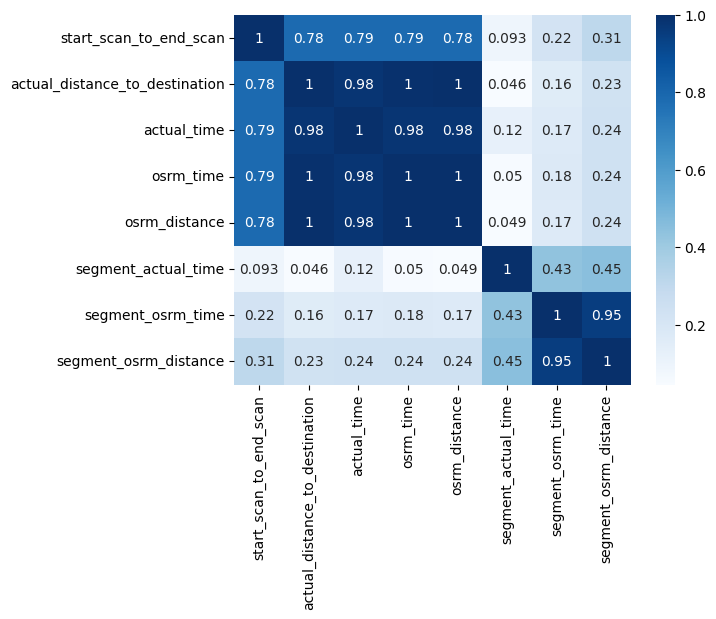

In [ ]:
df_corr = df_new[['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']]
sns.heatmap(df_corr.corr(), annot=True, cmap="Blues")

#<font color ='Orange'>Univariate Analysis</font>

In [ ]:
df_new.head(5)

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                3.583333                       10.435660     0.583333   
1                3.583333                       18.936842     1.000000   
2                3.583333                       27.637279     1.666667   
3                3.583333                       36.118028     2.583333   
4                3.583333                       39.386040     2.833333   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0   0.458333        11.9653             0.583333           0.458333   
1   0.833333        21.7243             0.416667           0.375000   
2   1.166667        32.5395             0.666667           0.291667   
3   1.666667        45.5620             0.875000           0.500000   
4   1.833333        54.2181             0.250000           0.208333   

   segment_osrm_distance source_state destination_state  
0                11.9653      Gujarat           Gujarat  
1                 9.7590      Gujarat           Gujarat  
2                10.8152      Gujarat           Gujarat  
3                13.0224      Gujarat           Gujarat  
4                 3.9153      Gujarat           Gujarat

##Categorical Columns

###Route Type

Frequency Count of `route_type`:
 route_type
FTL        99132
Carting    45184
Name: count, dtype: int64

Percentage Distribution of `route_type`:
 route_type
FTL        68.690928
Carting    31.309072
Name: proportion, dtype: float64

Mode of `route_type`:
 0    FTL
Name: route_type, dtype: object


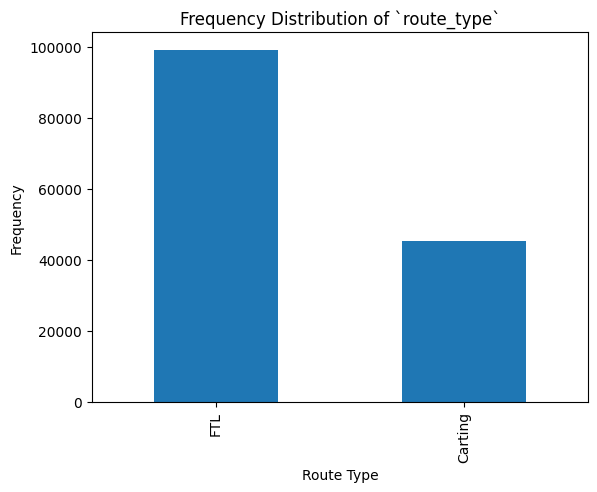

In [ ]:
# Frequency Count and Percentage for `route_type`
route_type_counts = df_new['route_type'].value_counts()
route_type_percent = df_new['route_type'].value_counts(normalize=True) * 100
print("Frequency Count of `route_type`:\n", route_type_counts)
print("\nPercentage Distribution of `route_type`:\n", route_type_percent)

# Mode of `route_type`
route_type_mode = df_new['route_type'].mode()
print("\nMode of `route_type`:\n", route_type_mode)

# Visualize with Bar Plot
route_type_counts.plot(kind='bar')
plt.title("Frequency Distribution of `route_type`")
plt.xlabel("Route Type")
plt.ylabel("Frequency")
plt.show()

###Source State

Frequency Count of `source_state`:
 source_state
Haryana              27408
Maharashtra          21401
Karnataka            19562
Tamil Nadu            7494
Gujarat               7202
Uttar Pradesh         7086
Telangana             6476
West Bengal           5963
Andhra Pradesh        5539
Rajasthan             5230
Punjab                4704
Delhi                 4382
Bihar                 4166
Madhya Pradesh        4018
Unknown State         2906
Assam                 2875
Jharkhand             2597
Kerala                2413
Uttarakhand           1162
Himachal Pradesh       587
Goa                    514
Arunachal Pradesh      245
Chhattisgarh           229
Meghalaya               86
Nagaland                40
Mizoram                 26
Tripura                  5
Name: count, dtype: int64

Percentage Distribution of `source_state`:
 source_state
Haryana              18.991657
Maharashtra          14.829264
Karnataka            13.554977
Tamil Nadu            5.192771
Gujarat       

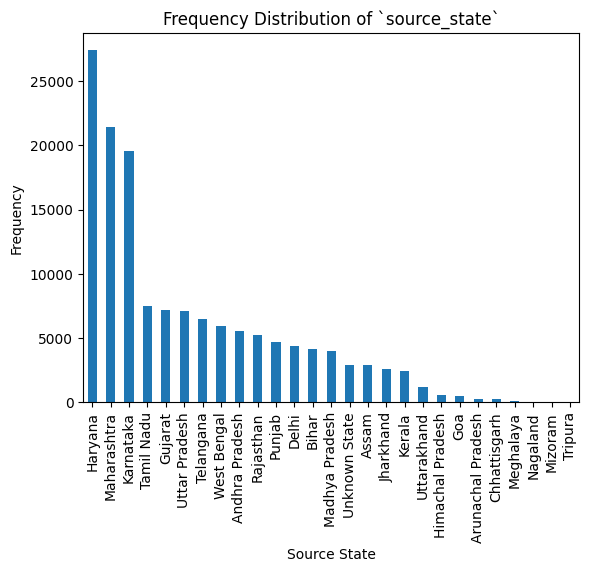

In [ ]:
# Frequency Count and Percentage for `source_state`
source_state_counts = df_new['source_state'].value_counts()
source_state_percent = df_new['source_state'].value_counts(normalize=True) * 100
print("Frequency Count of `source_state`:\n", source_state_counts)
print("\nPercentage Distribution of `source_state`:\n", source_state_percent)

# Mode of `source_state`
source_state_mode = df_new['source_state'].mode()
print("\nMode of `source_state`:\n", source_state_mode)

# Visualize with Bar Plot
source_state_counts.plot(kind='bar')
plt.title("Frequency Distribution of `source_state`")
plt.xlabel("Source State")
plt.ylabel("Frequency")
plt.show()

###Destination State

Frequency Count of `destination_state`:
 destination_state
Karnataka            21049
Haryana              20602
Maharashtra          18196
West Bengal           8499
Telangana             8200
Tamil Nadu            8058
Uttar Pradesh         7763
Gujarat               6714
Rajasthan             6271
Andhra Pradesh        6248
Delhi                 5746
Punjab                5105
Madhya Pradesh        4290
Bihar                 4230
Unknown State         4013
Jharkhand             2552
Kerala                2230
Assam                 2000
Uttarakhand            893
Goa                    580
Himachal Pradesh       553
Chhattisgarh           229
Arunachal Pradesh      211
Meghalaya               37
Mizoram                 31
Tripura                  9
Nagaland                 7
Name: count, dtype: int64

Percentage Distribution of `destination_state`:
 destination_state
Karnataka            14.585354
Haryana              14.275617
Maharashtra          12.608443
West Bengal           5.8

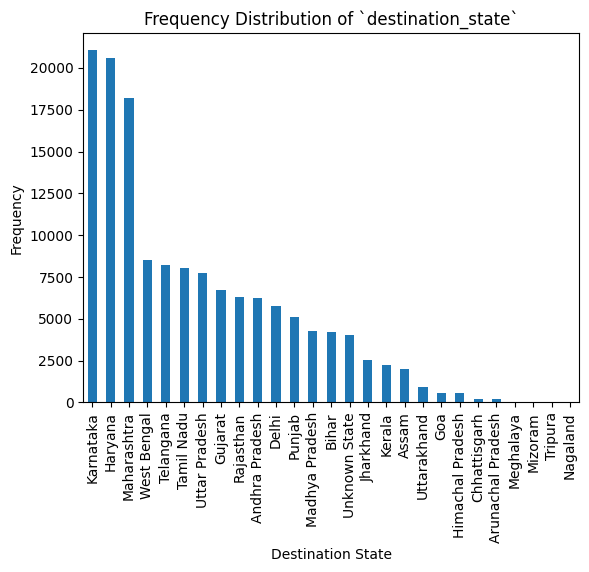

In [ ]:
# Frequency Count and Percentage for `destination_state`
destination_state_counts = df_new['destination_state'].value_counts()
destination_state_percent = df_new['destination_state'].value_counts(normalize=True) * 100
print("Frequency Count of `destination_state`:\n", destination_state_counts)
print("\nPercentage Distribution of `destination_state`:\n", destination_state_percent)

# Mode of `destination_state`
destination_state_mode = df_new['destination_state'].mode()
print("\nMode of `destination_state`:\n", destination_state_mode)

# Visualize with Bar Plot
destination_state_counts.plot(kind='bar')
plt.title("Frequency Distribution of `destination_state`")
plt.xlabel("Destination State")
plt.ylabel("Frequency")
plt.show()

##Numerical Columns

###Trip Duration

Descriptive Statistics for `start_scan_to_end_scan`:
 count    144316.000000
mean         40.154071
std          43.253457
min           0.833333
25%           6.708333
50%          18.791667
75%          68.541667
max         329.083333
Name: start_scan_to_end_scan, dtype: float64

Skewness of `start_scan_to_end_scan`: 1.1053463011517228
Kurtosis of `start_scan_to_end_scan`: -0.06370621019509048


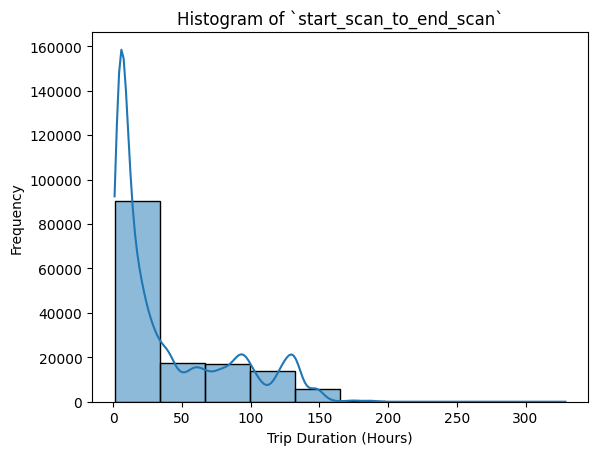

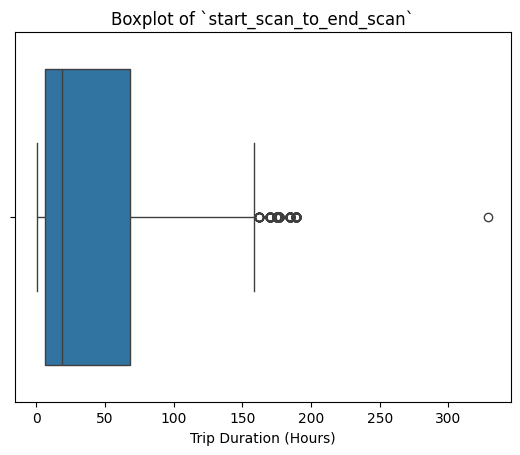

In [ ]:
# Descriptive Statistics
start_scan_stats = df_new['start_scan_to_end_scan'].describe()
print("Descriptive Statistics for `start_scan_to_end_scan`:\n", start_scan_stats)

# Skewness and Kurtosis
print("\nSkewness of `start_scan_to_end_scan`:", df_new['start_scan_to_end_scan'].skew())
print("Kurtosis of `start_scan_to_end_scan`:", df_new['start_scan_to_end_scan'].kurt())

# Histogram
sns.histplot(df_new['start_scan_to_end_scan'], bins=10, kde=True)
plt.title("Histogram of `start_scan_to_end_scan`")
plt.xlabel("Trip Duration (Hours)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(x=df_new['start_scan_to_end_scan'])
plt.title("Boxplot of `start_scan_to_end_scan`")
plt.xlabel("Trip Duration (Hours)")
plt.show()

###Actual Distance Covered

Descriptive Statistics for `actual_distance_to_destination`:
 count    144316.000000
mean        234.708498
std         345.480571
min           9.000045
25%          23.352027
50%          66.135322
75%         286.919294
max        1927.447705
Name: actual_distance_to_destination, dtype: float64

Skewness of `actual_distance_to_destination`: 1.9852173445904708
Kurtosis of `actual_distance_to_destination`: 3.3707756840385894


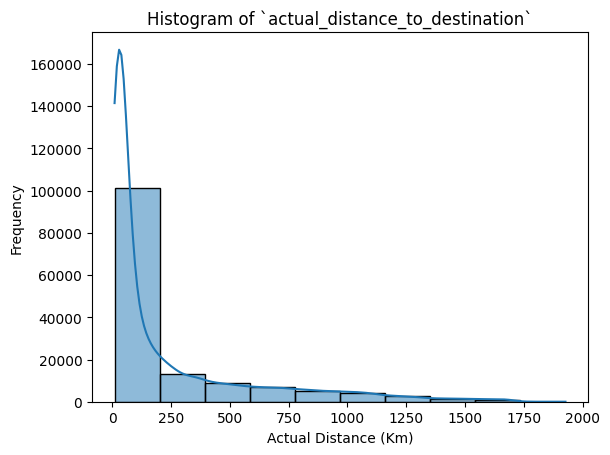

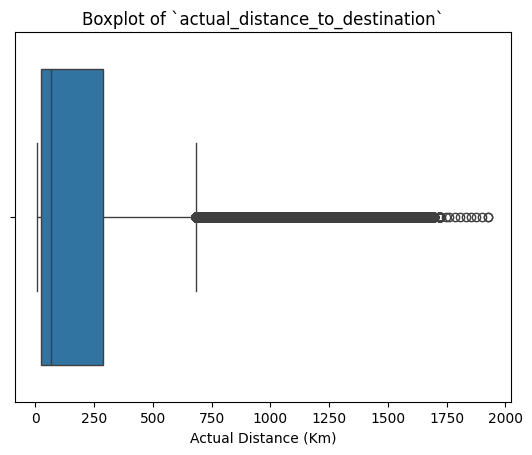

In [ ]:
actual_distance_stats = df_new['actual_distance_to_destination'].describe()
print("Descriptive Statistics for `actual_distance_to_destination`:\n", actual_distance_stats)

# Skewness and Kurtosis
print("\nSkewness of `actual_distance_to_destination`:", df_new['actual_distance_to_destination'].skew())
print("Kurtosis of `actual_distance_to_destination`:", df_new['actual_distance_to_destination'].kurt())

# Histogram
sns.histplot(df_new['actual_distance_to_destination'], bins=10, kde=True)
plt.title("Histogram of `actual_distance_to_destination`")
plt.xlabel("Actual Distance (Km)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(x=df_new['actual_distance_to_destination'])
plt.title("Boxplot of `actual_distance_to_destination`")
plt.xlabel("Actual Distance (Km)")
plt.show()

###Total Actual Time Taken

Descriptive Statistics for `actual_time`:
 count    144316.000000
mean         17.416510
std          24.955836
min           0.375000
25%           2.125000
50%           5.500000
75%          21.500000
max         188.833333
Name: actual_time, dtype: float64

Skewness of `actual_time`: 2.0623816658793035
Kurtosis of `actual_time`: 3.9353446914621157


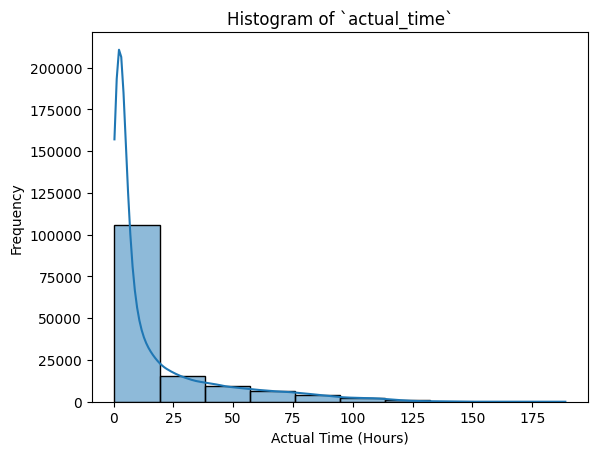

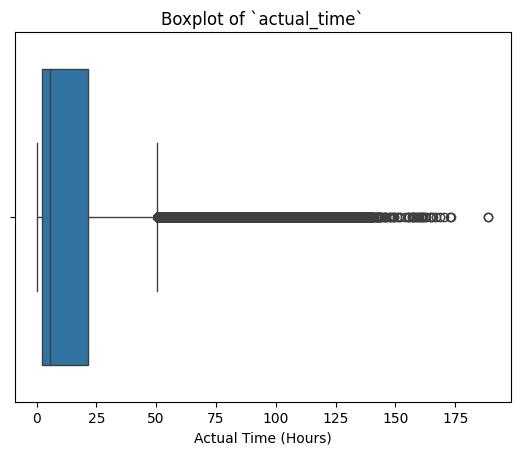

In [ ]:
# Descriptive Statistics
actual_time_stats = df_new['actual_time'].describe()
print("Descriptive Statistics for `actual_time`:\n", actual_time_stats)

# Skewness and Kurtosis
print("\nSkewness of `actual_time`:", df_new['actual_time'].skew())
print("Kurtosis of `actual_time`:", df_new['actual_time'].kurt())

# Histogram
sns.histplot(df_new['actual_time'], bins=10, kde=True)
plt.title("Histogram of `actual_time`")
plt.xlabel("Actual Time (Hours)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(x=df_new['actual_time'])
plt.title("Boxplot of `actual_time`")
plt.xlabel("Actual Time (Hours)")
plt.show()

###Time Estimated by OSRM

Descriptive Statistics for `osrm_time`:
 count    144316.000000
mean          8.934877
std          12.852023
min           0.250000
25%           1.125000
50%           2.666667
75%          10.791667
max          70.250000
Name: osrm_time, dtype: float64

Skewness of `osrm_time`: 2.0392497556534153
Kurtosis of `osrm_time`: 3.7278397549788904


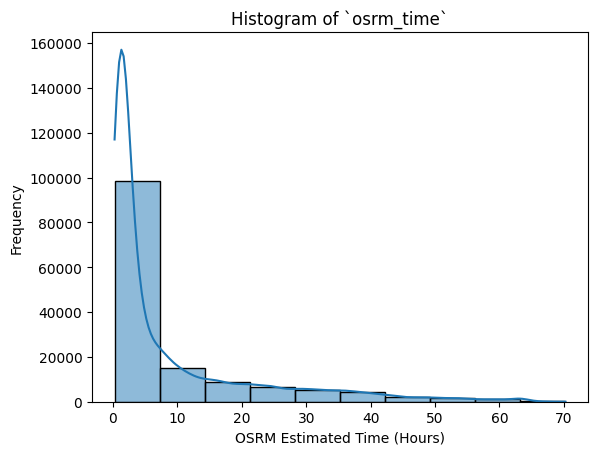

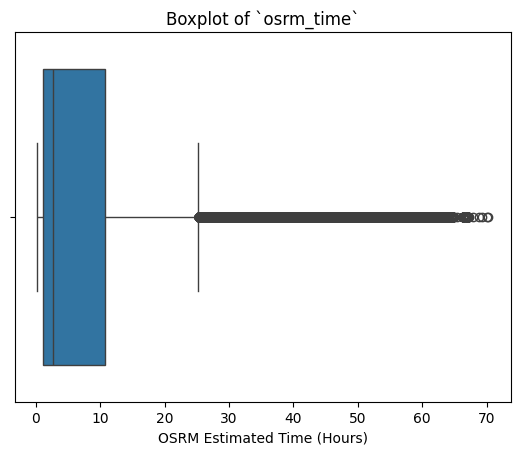

In [ ]:
# Descriptive Statistics
osrm_time_stats = df_new['osrm_time'].describe()
print("Descriptive Statistics for `osrm_time`:\n", osrm_time_stats)

# Skewness and Kurtosis
print("\nSkewness of `osrm_time`:", df_new['osrm_time'].skew())
print("Kurtosis of `osrm_time`:", df_new['osrm_time'].kurt())

# Histogram
sns.histplot(df_new['osrm_time'], bins=10, kde=True)
plt.title("Histogram of `osrm_time`")
plt.xlabel("OSRM Estimated Time (Hours)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(x=df_new['osrm_time'])
plt.title("Boxplot of `osrm_time`")
plt.xlabel("OSRM Estimated Time (Hours)")
plt.show()

###Distance Estimated by OSRM

Descriptive Statistics for `osrm_distance`:
 count    144316.000000
mean        285.549785
std         421.717826
min           9.008200
25%          29.896250
50%          78.624400
75%         346.305400
max        2326.199100
Name: osrm_distance, dtype: float64

Skewness of `osrm_distance`: 2.0423020304144477
Kurtosis of `osrm_distance`: 3.706471439755326


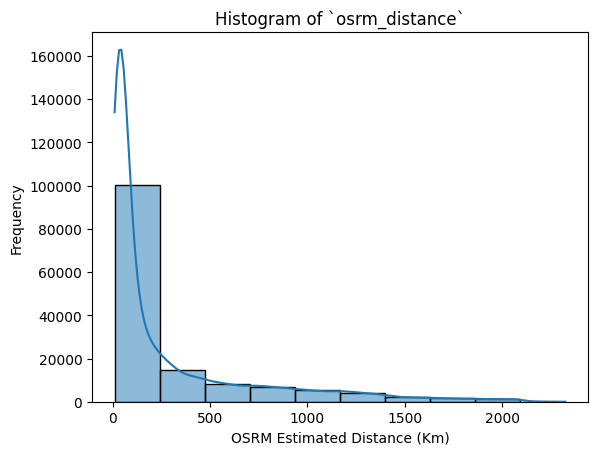

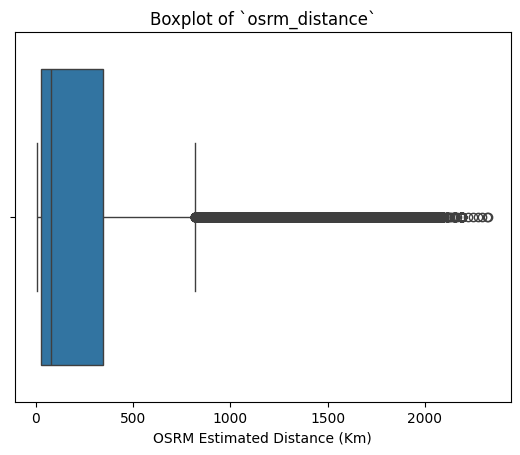

In [ ]:
# Descriptive Statistics
osrm_distance_stats = df_new['osrm_distance'].describe()
print("Descriptive Statistics for `osrm_distance`:\n", osrm_distance_stats)

# Skewness and Kurtosis
print("\nSkewness of `osrm_distance`:", df_new['osrm_distance'].skew())
print("Kurtosis of `osrm_distance`:", df_new['osrm_distance'].kurt())

# Histogram
sns.histplot(df_new['osrm_distance'], bins=10, kde=True)
plt.title("Histogram of `osrm_distance`")
plt.xlabel("OSRM Estimated Distance (Km)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(x=df_new['osrm_distance'])
plt.title("Boxplot of `osrm_distance`")
plt.xlabel("OSRM Estimated Distance (Km)")
plt.show()

###Segment-wise Actual Time

Descriptive Statistics for `segment_actual_time`:
 count    144316.000000
mean          1.507307
std           2.230179
min         -10.166667
25%           0.833333
50%           1.166667
75%           1.666667
max         127.125000
Name: segment_actual_time, dtype: float64

Skewness of `segment_actual_time`: 16.820429085091064
Kurtosis of `segment_actual_time`: 495.2757914833816


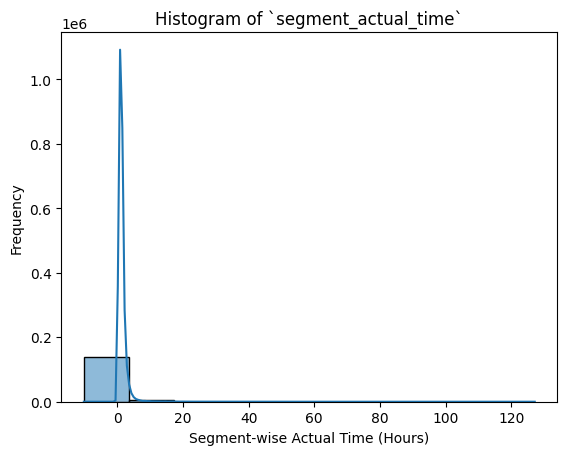

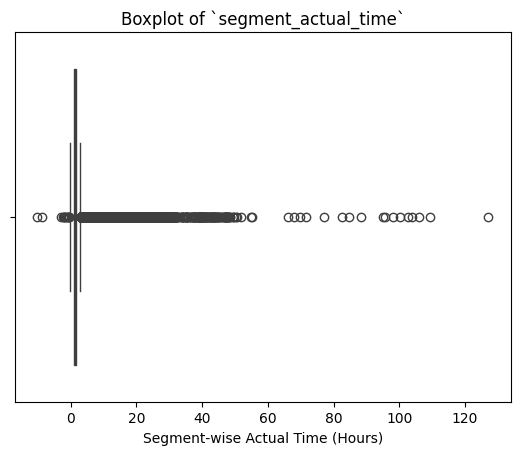

In [ ]:
# Descriptive Statistics
segment_actual_time_stats = df_new['segment_actual_time'].describe()
print("Descriptive Statistics for `segment_actual_time`:\n", segment_actual_time_stats)

# Skewness and Kurtosis
print("\nSkewness of `segment_actual_time`:", df_new['segment_actual_time'].skew())
print("Kurtosis of `segment_actual_time`:", df_new['segment_actual_time'].kurt())

# Histogram
sns.histplot(df_new['segment_actual_time'], bins=10, kde=True)
plt.title("Histogram of `segment_actual_time`")
plt.xlabel("Segment-wise Actual Time (Hours)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(x=df_new['segment_actual_time'])
plt.title("Boxplot of `segment_actual_time`")
plt.xlabel("Segment-wise Actual Time (Hours)")
plt.show()

###Segment-wise OSRM Estimated Time

Descriptive Statistics for `segment_osrm_time`:
 count    144316.000000
mean          0.770654
std           0.615584
min           0.000000
25%           0.458333
50%           0.708333
75%           0.916667
max          67.125000
Name: segment_osrm_time, dtype: float64

Skewness of `segment_osrm_time`: 19.70572743549668
Kurtosis of `segment_osrm_time`: 1450.7757107061282


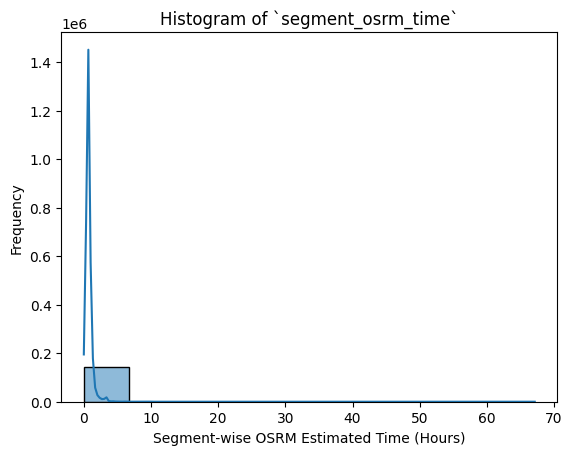

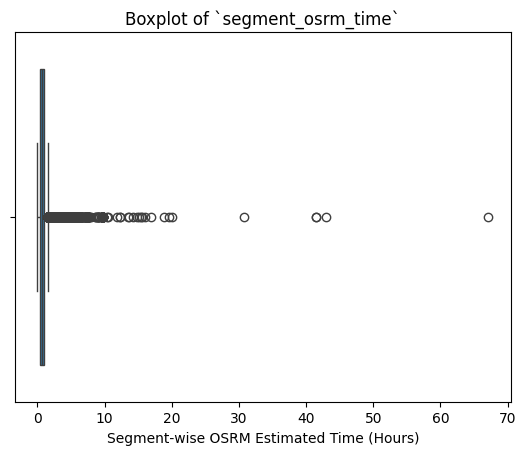

In [ ]:
# Descriptive Statistics
segment_osrm_time_stats = df_new['segment_osrm_time'].describe()
print("Descriptive Statistics for `segment_osrm_time`:\n", segment_osrm_time_stats)

# Skewness and Kurtosis
print("\nSkewness of `segment_osrm_time`:", df_new['segment_osrm_time'].skew())
print("Kurtosis of `segment_osrm_time`:", df_new['segment_osrm_time'].kurt())

# Histogram
sns.histplot(df_new['segment_osrm_time'], bins=10, kde=True)
plt.title("Histogram of `segment_osrm_time`")
plt.xlabel("Segment-wise OSRM Estimated Time (Hours)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(x=df_new['segment_osrm_time'])
plt.title("Boxplot of `segment_osrm_time`")
plt.xlabel("Segment-wise OSRM Estimated Time (Hours)")
plt.show()

###Segment-wise OSRM Estimated Distance

Descriptive Statistics for `segment_osrm_distance`:
 count    144316.000000
mean         22.818993
std          17.866367
min           0.000000
25%          12.053975
50%          23.508300
75%          27.813325
max        2191.403700
Name: segment_osrm_distance, dtype: float64

Skewness of `segment_osrm_distance`: 26.64316287839868
Kurtosis of `segment_osrm_distance`: 2323.075351573814


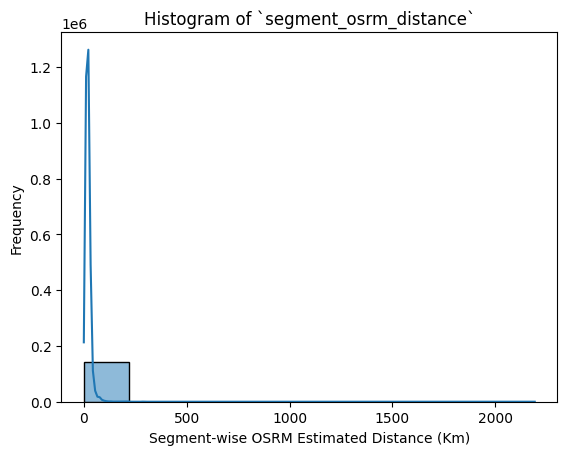

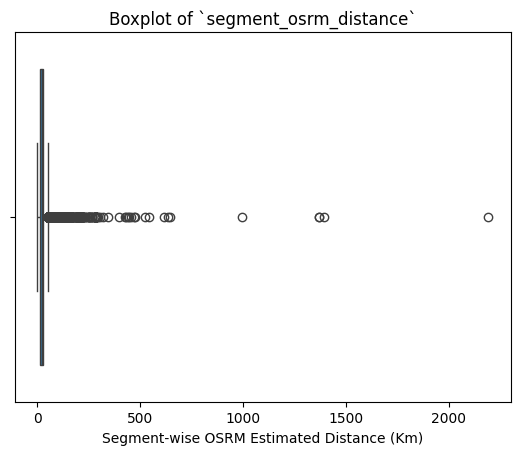

In [ ]:
# Descriptive Statistics
segment_osrm_distance_stats = df_new['segment_osrm_distance'].describe()
print("Descriptive Statistics for `segment_osrm_distance`:\n", segment_osrm_distance_stats)

# Skewness and Kurtosis
print("\nSkewness of `segment_osrm_distance`:", df_new['segment_osrm_distance'].skew())
print("Kurtosis of `segment_osrm_distance`:", df_new['segment_osrm_distance'].kurt())

# Histogram
sns.histplot(df_new['segment_osrm_distance'], bins=10, kde=True)
plt.title("Histogram of `segment_osrm_distance`")
plt.xlabel("Segment-wise OSRM Estimated Distance (Km)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
sns.boxplot(x=df_new['segment_osrm_distance'])
plt.title("Boxplot of `segment_osrm_distance`")
plt.xlabel("Segment-wise OSRM Estimated Distance (Km)")
plt.show()

##Date Time Columns

###Analyis on Trip Creation Time

In [ ]:

# df_trip_creation_time  = df_new['trip_creation_time'].copy()
df_trip_creation_time = pd.DataFrame({'trip_uuid': df_new['trip_uuid'],'Year': df_new['trip_creation_time'].dt.year,
                                      'Month':df_new['trip_creation_time'].dt.month,
                                      'Day':df_new['trip_creation_time'].dt.day,
                                      'Hour':df_new['trip_creation_time'].dt.hour,
                                      'Minute':df_new['trip_creation_time'].dt.minute,
                                      'Second':df_new['trip_creation_time'].dt.second,
                                      'Micro Second':df_new['trip_creation_time'].dt.microsecond})
                                      # 'tzinfo':df_new['trip_creation_time'].dt.tzinfo})

In [ ]:
df_trip_creation_time

trip_uuid  Year  Month  Day  Hour  Minute  Second  \
0       trip-153741093647649320  2018      9   20     2      35      36   
1       trip-153741093647649320  2018      9   20     2      35      36   
2       trip-153741093647649320  2018      9   20     2      35      36   
3       trip-153741093647649320  2018      9   20     2      35      36   
4       trip-153741093647649320  2018      9   20     2      35      36   
...                         ...   ...    ...  ...   ...     ...     ...   
144862  trip-153746066843555182  2018      9   20    16      24      28   
144863  trip-153746066843555182  2018      9   20    16      24      28   
144864  trip-153746066843555182  2018      9   20    16      24      28   
144865  trip-153746066843555182  2018      9   20    16      24      28   
144866  trip-153746066843555182  2018      9   20    16      24      28   

        Micro Second  
0             476840  
1             476840  
2             476840  
3             476840  
4             476840  
...              ...  
144862        436231  
144863        436231  
144864        436231  
144865        436231  
144866        436231  

[144316 rows x 8 columns]

In [ ]:
df_trip_creation_time_unique = df_trip_creation_time.drop_duplicates()

In [ ]:
df_trip_creation_time_unique

trip_uuid  Year  Month  Day  Hour  Minute  Second  \
0       trip-153741093647649320  2018      9   20     2      35      36   
10      trip-153768492602129387  2018      9   23     6      42       6   
15      trip-153693976643699843  2018      9   14    15      42      46   
17      trip-153687145942424248  2018      9   13    20      44      19   
35      trip-153825970514894360  2018      9   29    22      21      45   
...                         ...   ...    ...  ...   ...     ...     ...   
144828  trip-153799142965708367  2018      9   26    19      50      29   
144847  trip-153695073416451616  2018      9   14    18      45      34   
144849  trip-153761584139918815  2018      9   22    11      30      41   
144854  trip-153718412883843340  2018      9   17    11      35      28   
144858  trip-153746066843555182  2018      9   20    16      24      28   

        Micro Second  
0             476840  
10             21680  
15            437249  
17            424489  
35            149226  
...              ...  
144828        657378  
144847        164734  
144849        399439  
144854        838714  
144858        436231  

[14787 rows x 8 columns]

In [ ]:
df_trip_creation_time_unique['Month'].unique()

array([ 9, 10], dtype=int32)

In [ ]:
df_trip_creation_time_unique['Month'].value_counts()

Month
9     13011
10     1776
Name: count, dtype: int64

In [ ]:
df_trip_creation_time_count = df_trip_creation_time_unique[['Year','Month','Day']].value_counts()

In [ ]:
df_trip_creation_time_count

Year  Month  Day
2018  9      18     791
             15     783
             13     750
             12     747
             21     740
             22     740
             17     722
             14     712
             20     703
             25     695
             26     683
             19     674
             24     658
             27     650
             23     631
      10     3      627
      9      16     616
             28     605
             29     605
      10     1      600
             2      549
      9      30     506
Name: count, dtype: int64

In [ ]:
df_trip_creation_time_count = df_trip_creation_time_count.reset_index()

In [ ]:
df_trip_creation_time_count

Year  Month  Day  count
0   2018      9   18    791
1   2018      9   15    783
2   2018      9   13    750
3   2018      9   12    747
4   2018      9   21    740
5   2018      9   22    740
6   2018      9   17    722
7   2018      9   14    712
8   2018      9   20    703
9   2018      9   25    695
10  2018      9   26    683
11  2018      9   19    674
12  2018      9   24    658
13  2018      9   27    650
14  2018      9   23    631
15  2018     10    3    627
16  2018      9   16    616
17  2018      9   28    605
18  2018      9   29    605
19  2018     10    1    600
20  2018     10    2    549
21  2018      9   30    506

###Analyis on Trip start Time

In [ ]:
df_od_start_time = pd.DataFrame({'trip_uuid':df_new['trip_uuid'], 'Year': df_new['od_start_time'].dt.year,
                                      'Month':df_new['od_start_time'].dt.month,
                                      'Day':df_new['od_start_time'].dt.day,
                                      'Hour':df_new['od_start_time'].dt.hour,
                                      'Minute':df_new['od_start_time'].dt.minute,
                                      'Second':df_new['od_start_time'].dt.second,
                                      'Micro Second':df_new['od_start_time'].dt.microsecond})
                                      # 'tzinfo':df_new['od_start_time'].dt.tzinfo})

In [ ]:
df_od_start_time

trip_uuid  Year  Month  Day  Hour  Minute  Second  \
0       trip-153741093647649320  2018      9   20     3      21      32   
1       trip-153741093647649320  2018      9   20     3      21      32   
2       trip-153741093647649320  2018      9   20     3      21      32   
3       trip-153741093647649320  2018      9   20     3      21      32   
4       trip-153741093647649320  2018      9   20     3      21      32   
...                         ...   ...    ...  ...   ...     ...     ...   
144862  trip-153746066843555182  2018      9   20    16      24      28   
144863  trip-153746066843555182  2018      9   20    16      24      28   
144864  trip-153746066843555182  2018      9   20    16      24      28   
144865  trip-153746066843555182  2018      9   20    16      24      28   
144866  trip-153746066843555182  2018      9   20    16      24      28   

        Micro Second  
0             418600  
1             418600  
2             418600  
3             418600  
4             418600  
...              ...  
144862        436231  
144863        436231  
144864        436231  
144865        436231  
144866        436231  

[144316 rows x 8 columns]

In [ ]:
df_od_start_time_unique = df_od_start_time[~df_od_start_time['trip_uuid'].duplicated()]
df_od_start_time_unique.head(2)

trip_uuid  Year  Month  Day  Hour  Minute  Second  \
0   trip-153741093647649320  2018      9   20     3      21      32   
10  trip-153768492602129387  2018      9   23     6      42       6   

    Micro Second  
0         418600  
10         21680

In [ ]:
df_od_start_time_unique['Month'].unique()

array([ 9, 10], dtype=int32)

In [ ]:
df_od_start_time_unique['Month'].value_counts()

Month
9     12957
10     1830
Name: count, dtype: int64

In [ ]:
df_od_start_time_count = df_od_start_time_unique[['Year','Month','Day']].value_counts()
df_od_start_time_count

Year  Month  Day
2018  9      15     818
             18     792
             22     757
             13     735
             21     733
             17     716
             20     708
             25     698
             26     698
             14     697
             12     696
             19     669
             27     650
             24     650
      10     3      639
      9      23     618
             29     612
             28     604
             16     604
      10     1      598
             2      539
      9      30     502
      10     4       54
Name: count, dtype: int64

In [ ]:
df_od_start_time_count = df_od_start_time_count.reset_index()

In [ ]:
df_od_start_time_count

Year  Month  Day  count
0   2018      9   15    818
1   2018      9   18    792
2   2018      9   22    757
3   2018      9   13    735
4   2018      9   21    733
5   2018      9   17    716
6   2018      9   20    708
7   2018      9   25    698
8   2018      9   26    698
9   2018      9   14    697
10  2018      9   12    696
11  2018      9   19    669
12  2018      9   27    650
13  2018      9   24    650
14  2018     10    3    639
15  2018      9   23    618
16  2018      9   29    612
17  2018      9   28    604
18  2018      9   16    604
19  2018     10    1    598
20  2018     10    2    539
21  2018      9   30    502
22  2018     10    4     54

###Analysis on Trip End Time

In [ ]:
df_od_end_time = pd.DataFrame({'trip_uuid':df_new['trip_uuid'],'Year': df_new['od_end_time'].dt.year,
                                      'Month':df_new['od_end_time'].dt.month,
                                      'Day':df_new['od_end_time'].dt.day,
                                      'Hour':df_new['od_end_time'].dt.hour,
                                      'Minute':df_new['od_end_time'].dt.minute,
                                      'Second':df_new['od_end_time'].dt.second,
                                      'Micro Second':df_new['od_end_time'].dt.microsecond})
                                      # 'tzinfo':df_new['od_end_time'].dt.tzinfo})

In [ ]:
df_od_end_time_unique = df_od_end_time[~df_od_end_time['trip_uuid'].duplicated()]
df_od_end_time_unique.head(3)

trip_uuid  Year  Month  Day  Hour  Minute  Second  \
0   trip-153741093647649320  2018      9   20     4      47      45   
10  trip-153768492602129387  2018      9   23    11      44      28   
15  trip-153693976643699843  2018      9   14    17      31      45   

    Micro Second  
0         236797  
10        365845  
15        368791

In [ ]:
df_od_end_time_unique['Month'].unique()

array([ 9, 10], dtype=int32)

In [ ]:
df_od_end_time_unique['Month'].value_counts()

Month
9     12781
10     2006
Name: count, dtype: int64

In [ ]:
df_od_end_time_count  = df_od_end_time_unique[['Year','Month','Day']].value_counts()
df_od_end_time_count

Year  Month  Day
2018  9      15     803
             22     794
             18     772
             20     743
             14     735
             25     703
             26     695
             17     693
             27     686
             13     683
             19     681
             21     674
             29     634
             16     631
             24     631
             23     620
      10     3      615
      9      28     610
      10     1      596
             2      524
      9      12     499
             30     494
      10     4      250
             5       17
             6        3
             8        1
Name: count, dtype: int64

In [ ]:
df_od_end_time_count = df_od_end_time_count.reset_index()

In [ ]:
df_od_end_time_count

Year  Month  Day  count
0   2018      9   15    803
1   2018      9   22    794
2   2018      9   18    772
3   2018      9   20    743
4   2018      9   14    735
5   2018      9   25    703
6   2018      9   26    695
7   2018      9   17    693
8   2018      9   27    686
9   2018      9   13    683
10  2018      9   19    681
11  2018      9   21    674
12  2018      9   29    634
13  2018      9   16    631
14  2018      9   24    631
15  2018      9   23    620
16  2018     10    3    615
17  2018      9   28    610
18  2018     10    1    596
19  2018     10    2    524
20  2018      9   12    499
21  2018      9   30    494
22  2018     10    4    250
23  2018     10    5     17
24  2018     10    6      3
25  2018     10    8      1

###Combined Analysis on Trip Creation, Trip Start and Trip End Time

In [ ]:
# df_trip_creation_time_count
# df_od_start_time_count
# df_od_end_time_count

df_creation_start_end_merged = pd.merge(
    pd.merge(df_trip_creation_time_count, df_od_start_time_count,
             on=['Year', 'Month', 'Day'], how='outer', suffixes=('_trip_creation_time', '_start_time'))
              , df_od_end_time_count, on=['Year', 'Month', 'Day'], how='outer')

In [ ]:
df_creation_start_end_merged.head(3)

Year  Month  Day  count_trip_creation_time  count_start_time  count
0  2018      9   18                     791.0             792.0    772
1  2018      9   15                     783.0             818.0    803
2  2018      9   13                     750.0             735.0    683

In [ ]:
df_creation_start_end_merged.rename({'count': 'count_end_time'}, axis=1, inplace=True)
df_creation_start_end_merged.head(3)

Year  Month  Day  count_trip_creation_time  count_start_time  \
0  2018      9   18                     791.0             792.0   
1  2018      9   15                     783.0             818.0   
2  2018      9   13                     750.0             735.0   

   count_end_time  
0             772  
1             803  
2             683

In [ ]:
# def combine_year_month_day(dataFrame):
#   return str(dataFrame['Year']) + '-'+ str(dataFrame['Month']) + '-'+ str(dataFrame['Day'])

# df_creation_start_end_merged['Date'] = df_creation_start_end_merged.apply(combine_year_month_day, axis=1)

df_creation_start_end_merged['Date'] = pd.to_datetime(df_creation_start_end_merged[['Year', 'Month', 'Day']])

In [ ]:
df_creation_start_end_merged.sort_values(by='Date', axis=0, inplace=True, ascending=True)
df_creation_start_end_merged

Year  Month  Day  count_trip_creation_time  count_start_time  \
3   2018      9   12                     747.0             696.0   
2   2018      9   13                     750.0             735.0   
7   2018      9   14                     712.0             697.0   
1   2018      9   15                     783.0             818.0   
16  2018      9   16                     616.0             604.0   
6   2018      9   17                     722.0             716.0   
0   2018      9   18                     791.0             792.0   
11  2018      9   19                     674.0             669.0   
8   2018      9   20                     703.0             708.0   
4   2018      9   21                     740.0             733.0   
5   2018      9   22                     740.0             757.0   
14  2018      9   23                     631.0             618.0   
12  2018      9   24                     658.0             650.0   
9   2018      9   25                     695.0             698.0   
10  2018      9   26                     683.0             698.0   
13  2018      9   27                     650.0             650.0   
17  2018      9   28                     605.0             604.0   
18  2018      9   29                     605.0             612.0   
21  2018      9   30                     506.0             502.0   
19  2018     10    1                     600.0             598.0   
20  2018     10    2                     549.0             539.0   
15  2018     10    3                     627.0             639.0   
22  2018     10    4                       NaN              54.0   
23  2018     10    5                       NaN               NaN   
24  2018     10    6                       NaN               NaN   
25  2018     10    8                       NaN               NaN   

    count_end_time       Date  
3              499 2018-09-12  
2              683 2018-09-13  
7              735 2018-09-14  
1              803 2018-09-15  
16             631 2018-09-16  
6              693 2018-09-17  
0              772 2018-09-18  
11             681 2018-09-19  
8              743 2018-09-20  
4              674 2018-09-21  
5              794 2018-09-22  
14             620 2018-09-23  
12             631 2018-09-24  
9              703 2018-09-25  
10             695 2018-09-26  
13             686 2018-09-27  
17             610 2018-09-28  
18             634 2018-09-29  
21             494 2018-09-30  
19             596 2018-10-01  
20             524 2018-10-02  
15             615 2018-10-03  
22             250 2018-10-04  
23              17 2018-10-05  
24               3 2018-10-06  
25               1 2018-10-08

In [ ]:
df_melted = df_creation_start_end_merged.melt(id_vars=['Date'], value_vars=['count_trip_creation_time', 'count_start_time', 'count_end_time'],
                    var_name='Count Type',
                    value_name='Count')

In [ ]:
def strip_prefix(count_type):
  if count_type == 'count_trip_creation_time':
    replace_string = ''
  else:
    replace_string = 'od_'
  return count_type.replace('count_', replace_string)

df_melted['Count Type'] = df_melted['Count Type'].apply(strip_prefix)

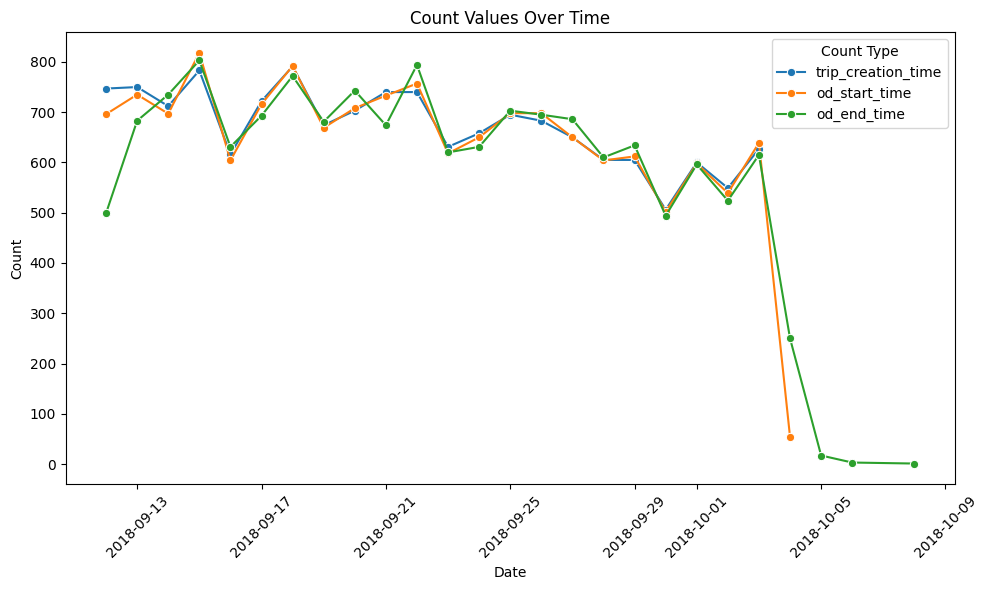

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_melted, x='Date', y='Count', hue='Count Type', marker='o')
# Step 3: Customize the plot
plt.title('Count Values Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#Bi-Variate Analysis

##Numerical-Numerical Analysis

### actual_distance_to_destination vs. actual_time

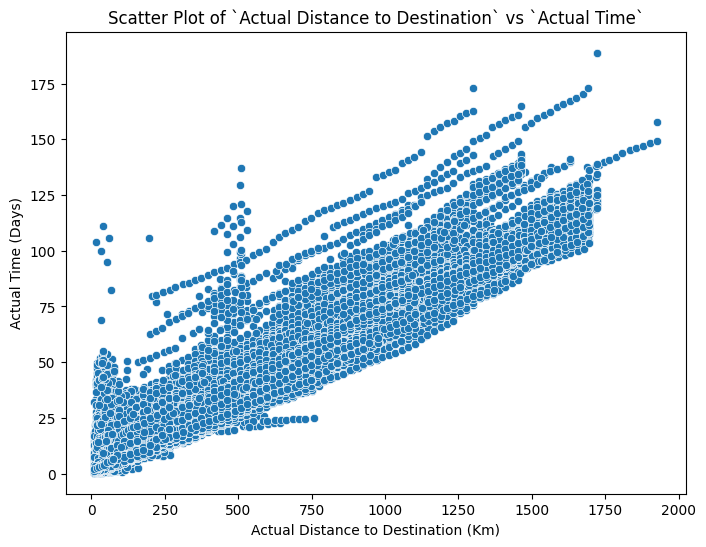

Correlation between `actual_distance_to_destination` and `actual_time`:
                                 actual_distance_to_destination  actual_time
actual_distance_to_destination                        1.000000     0.978683
actual_time                                           0.978683     1.000000


In [ ]:
# Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_distance_to_destination', y='actual_time', data=df_new)
plt.title("Scatter Plot of `Actual Distance to Destination` vs `Actual Time`")
plt.xlabel("Actual Distance to Destination (Km)")
plt.ylabel("Actual Time (Days)")
plt.show()

# Correlation Coefficient
correlation = df_new[['actual_distance_to_destination', 'actual_time']].corr()
print("Correlation between `actual_distance_to_destination` and `actual_time`:\n", correlation)

###osrm_distance vs. osrm_time

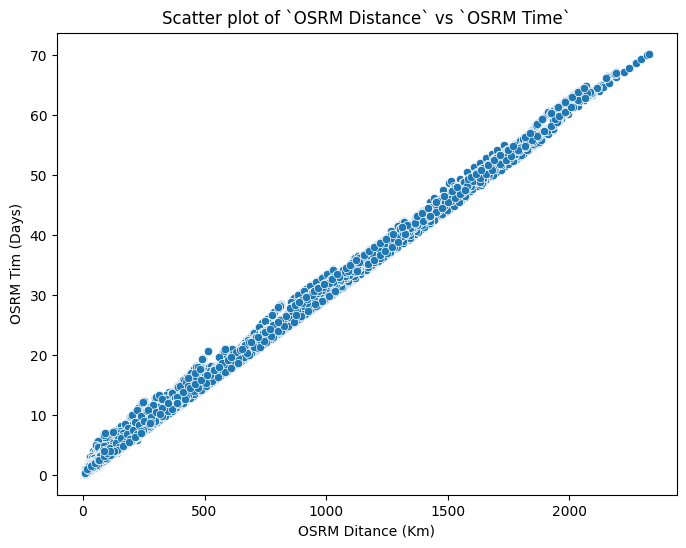

Correlation between `osrm_distance` and `osrm_time`:
                osrm_distance  osrm_time
osrm_distance       1.000000   0.999119
osrm_time           0.999119   1.000000


In [ ]:
# Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='osrm_distance', y='osrm_time', data=df_new)
plt.title("Scatter plot of `OSRM Distance` vs `OSRM Time`")
plt.xlabel("OSRM Ditance (Km)")
plt.ylabel("OSRM Tim (Days)")
plt.show()

# Correlation Coefficient
correlation = df_new[['osrm_distance', 'osrm_time']].corr()
print("Correlation between `osrm_distance` and `osrm_time`:\n", correlation)

###actual_time vs. osrm_time

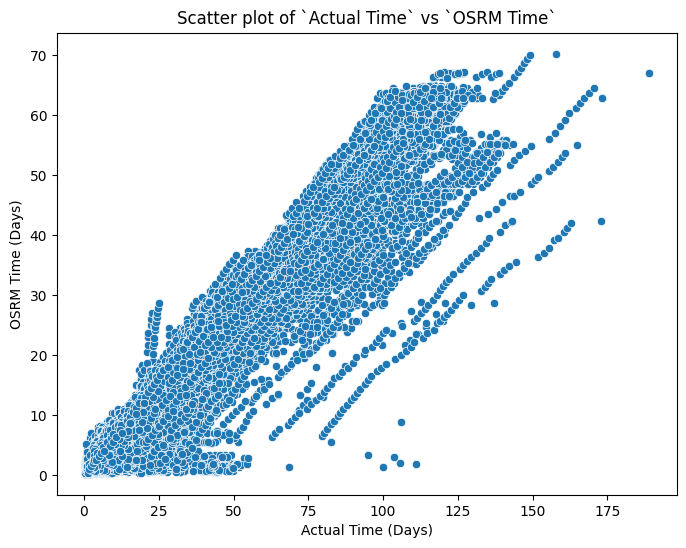

Correlation between `actual_time` and `osrm_time`:
              actual_time  osrm_time
actual_time     1.000000   0.978022
osrm_time       0.978022   1.000000


In [ ]:
# Scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_time', y='osrm_time', data=df_new)
plt.title("Scatter plot of `Actual Time` vs `OSRM Time`")
plt.xlabel("Actual Time (Days)")
plt.ylabel("OSRM Time (Days)")
plt.show()

# Correlation Coefficient
correlation = df_new[['actual_time', 'osrm_time']].corr()
print("Correlation between `actual_time` and `osrm_time`:\n", correlation)

##Categorical-Categorical Analysis

###source_state vs. destination_state

Crosstab of `source_state` vs. `destination_state`:
 destination_state  Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  \
source_state                                                         
Andhra Pradesh               3755                  0      0      0   
Arunachal Pradesh               0                 65    180      0   
Assam                           0                146   1390      0   
Bihar                           0                  0      0   2770   
Chhattisgarh                    0                  0      0      0   
Delhi                           0                  0     68      0   
Goa                             0                  0      0      0   
Gujarat                         0                  0      0      0   
Haryana                       686                  0      0   1385   
Himachal Pradesh                0                  0      0      0   
Jharkhand                       0                  0     33     52   
Karnataka                     390    

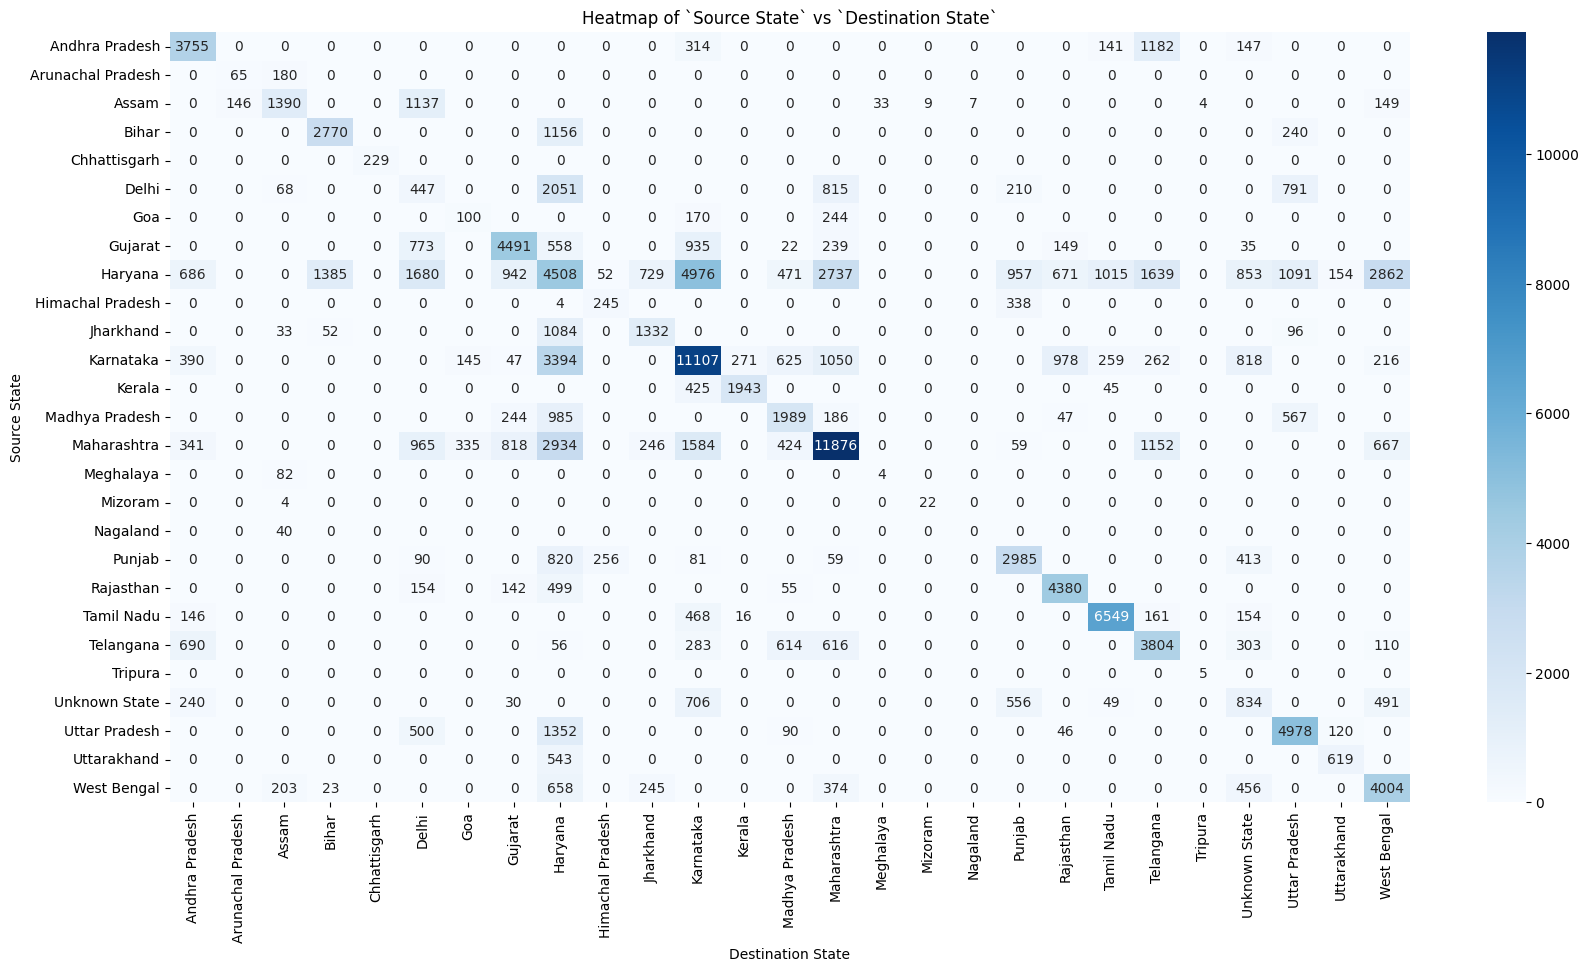

In [ ]:
# Crosstab for Frequency Count
state_crosstab = pd.crosstab(df_new['source_state'], df_new['destination_state'])
print("Crosstab of `source_state` vs. `destination_state`:\n", state_crosstab)

# Heatmap Visualization
plt.figure(figsize=(20, 10))
sns.heatmap(state_crosstab, annot=True, cmap='Blues', fmt='d')
plt.title("Heatmap of `Source State` vs `Destination State`")
plt.xlabel("Destination State")
plt.ylabel("Source State")
plt.show()

###route_type vs. destination_state

Crosstab of `route_type` vs. `destination_state`:
 destination_state  Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  \
route_type                                                           
Carting                      1563                172    837    110   
FTL                          4685                 39   1163   4120   

destination_state  Chhattisgarh  Delhi  Goa  Gujarat  Haryana  \
route_type                                                      
Carting                     127   2242   82     2215     5939   
FTL                         102   3504  498     4499    14663   

destination_state  Himachal Pradesh  Jharkhand  Karnataka  ...  Meghalaya  \
route_type                                                 ...              
Carting                           0        588       8149  ...          0   
FTL                             553       1964      12900  ...         37   

destination_state  Mizoram  Nagaland  Punjab  Rajasthan  Tamil Nadu  \
route_type                 

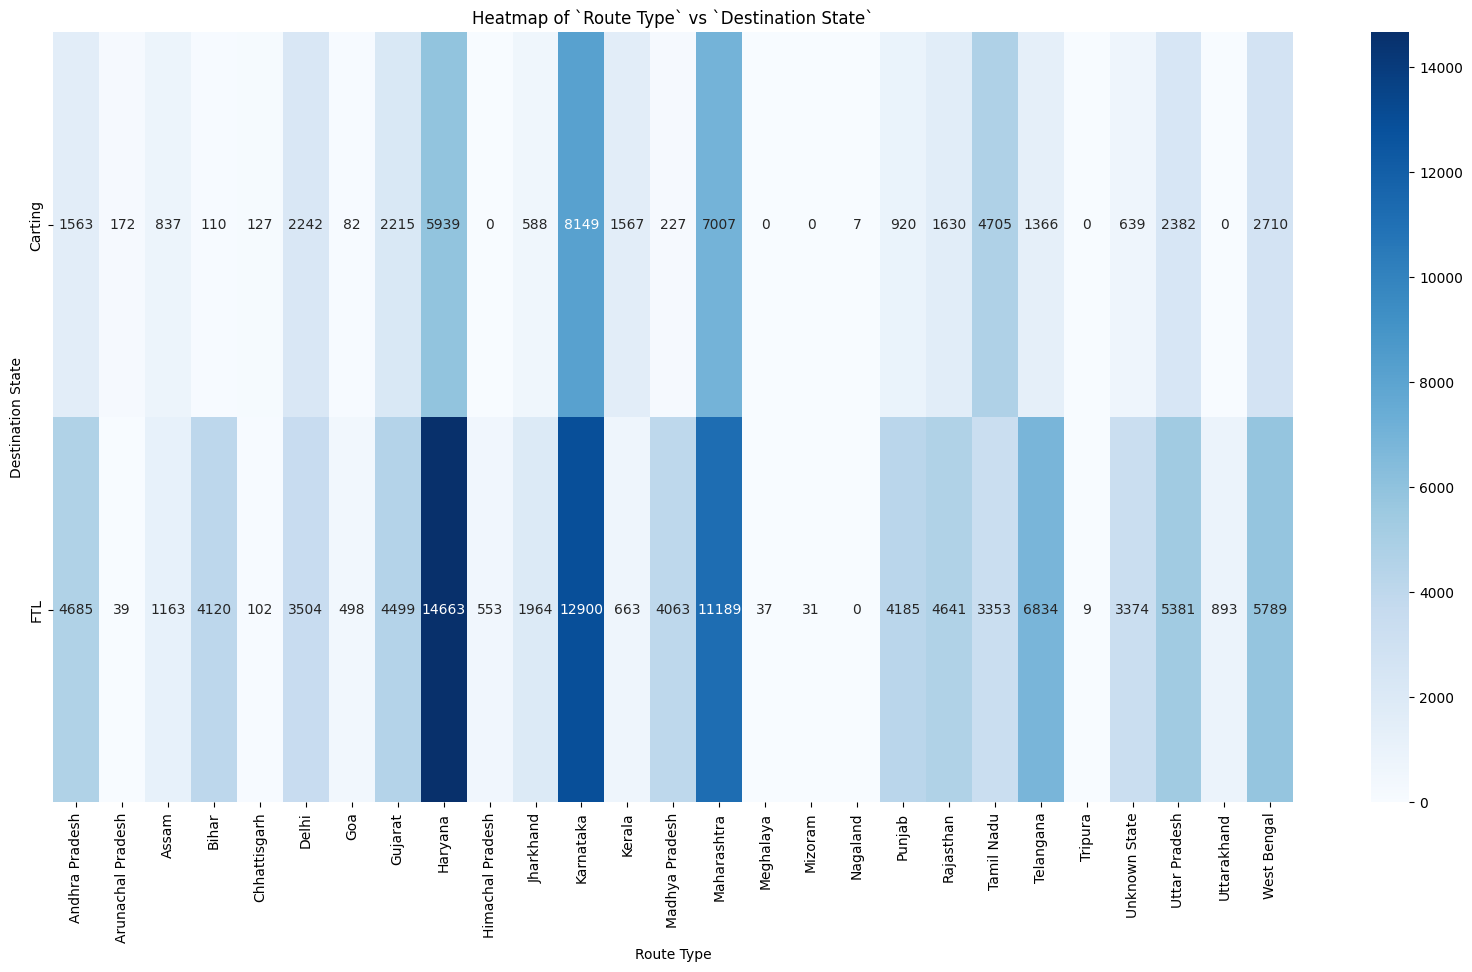

In [ ]:
# Crosstab for Frequency Count

route_crosstab = pd.crosstab(df_new['route_type'], df_new['destination_state'])
print("Crosstab of `route_type` vs. `destination_state`:\n", route_crosstab)

# Heatmap Visualization
plt.figure(figsize=(20, 10))
sns.heatmap(route_crosstab, annot=True, cmap='Blues', fmt='d')
plt.title("Heatmap of `Route Type` vs `Destination State`")
plt.ylabel("Destination State")
plt.xlabel("Route Type")
plt.show()

###route_type vs. source_state

Crosstab of `route_type` vs. `source_state`:
 source_state  Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  Chhattisgarh  \
route_type                                                                    
Carting                 1537                215    761    110           127   
FTL                     4002                 30   2114   4056           102   

source_state  Delhi  Goa  Gujarat  Haryana  Himachal Pradesh  Jharkhand  \
route_type                                                                
Carting        2462   82     2220     5593                 0        588   
FTL            1920  432     4982    21815               587       2009   

source_state  Karnataka  ...  Meghalaya  Mizoram  Nagaland  Punjab  Rajasthan  \
route_type               ...                                                    
Carting            8213  ...          0        0        40     746       1836   
FTL               11349  ...         86       26         0    3958       3394   

source_stat

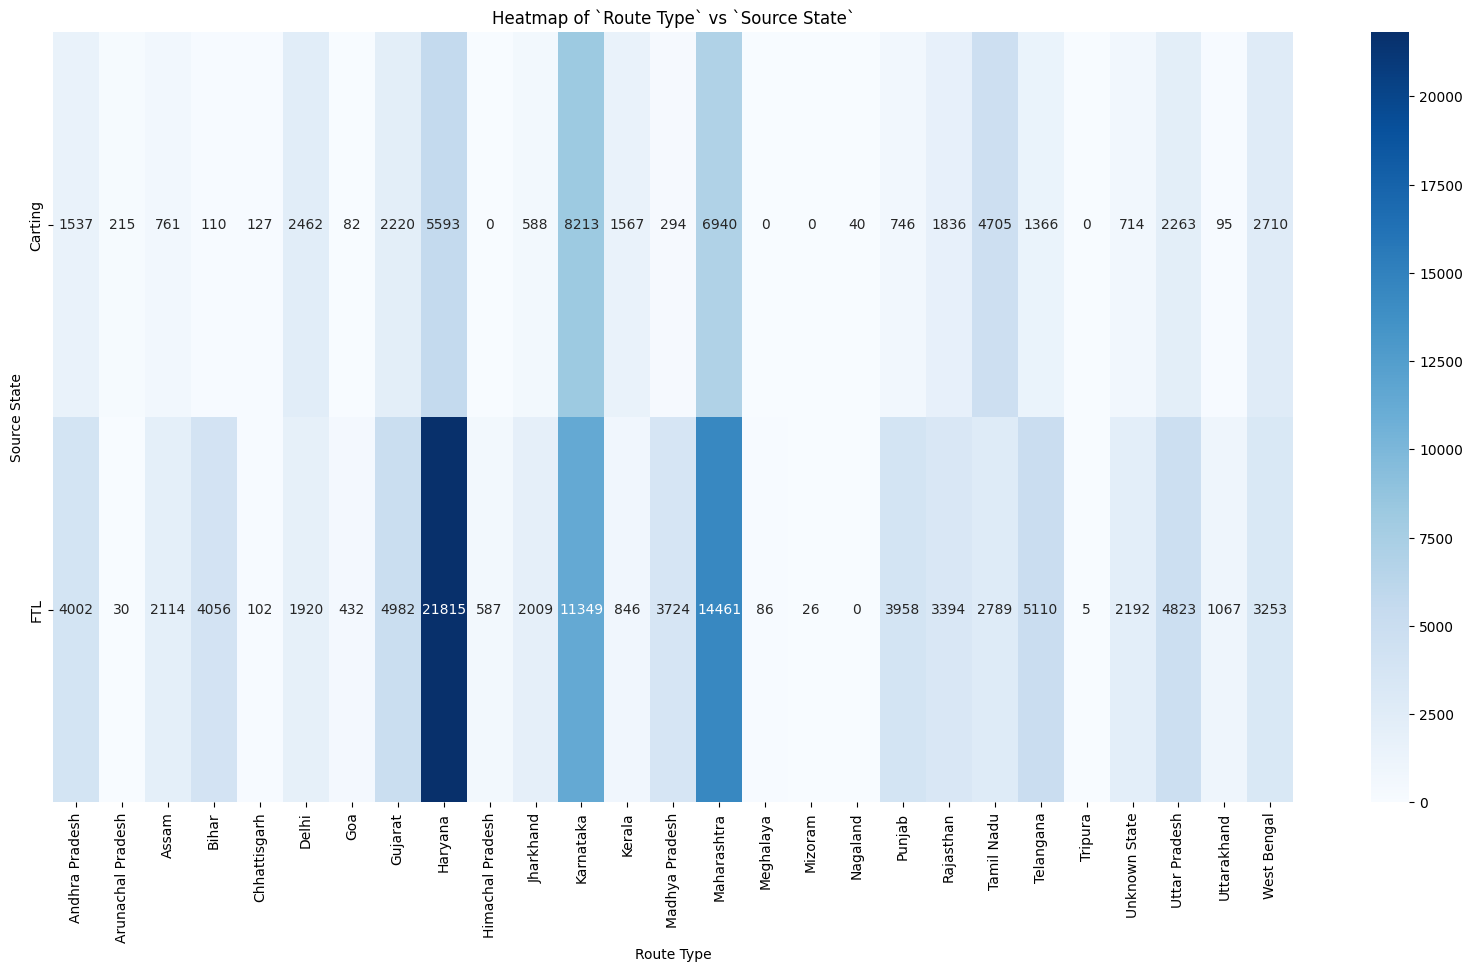

In [ ]:
# Crosstab for Frequency Count

route_crosstab = pd.crosstab(df_new['route_type'], df_new['source_state'])
print("Crosstab of `route_type` vs. `source_state`:\n", route_crosstab)

# Heatmap Visualization
plt.figure(figsize=(20, 10))
sns.heatmap(route_crosstab, annot=True, cmap='Blues', fmt='d')
plt.title("Heatmap of `Route Type` vs `Source State`")
plt.ylabel("Source State")
plt.xlabel("Route Type")
plt.show()

##Categorical-Numerical Analysis

###source_state vs. actual_distance_to_destination

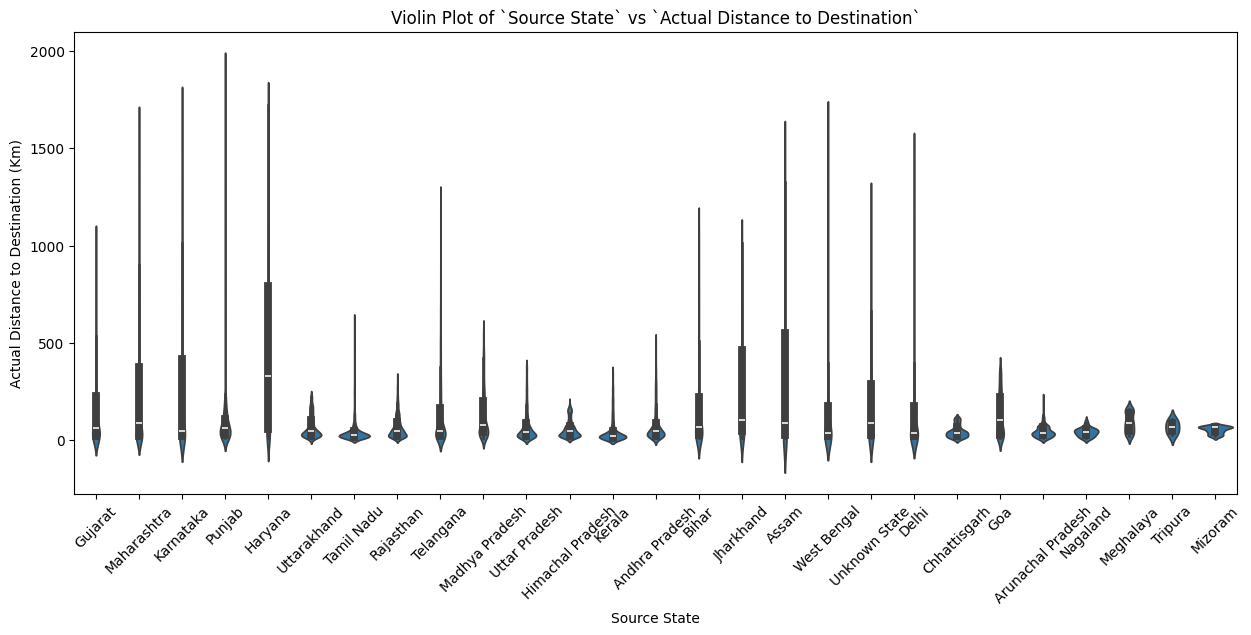

In [ ]:
# Violin Plot
plt.figure(figsize=(15, 6))
sns.violinplot(x='source_state', y='actual_distance_to_destination', data=df_new)
plt.title("Violin Plot of `Source State` vs `Actual Distance to Destination`")
plt.xlabel("Source State")
plt.ylabel("Actual Distance to Destination (Km)")
plt.xticks(rotation=45)
plt.show()

###destination_state vs. actual_time

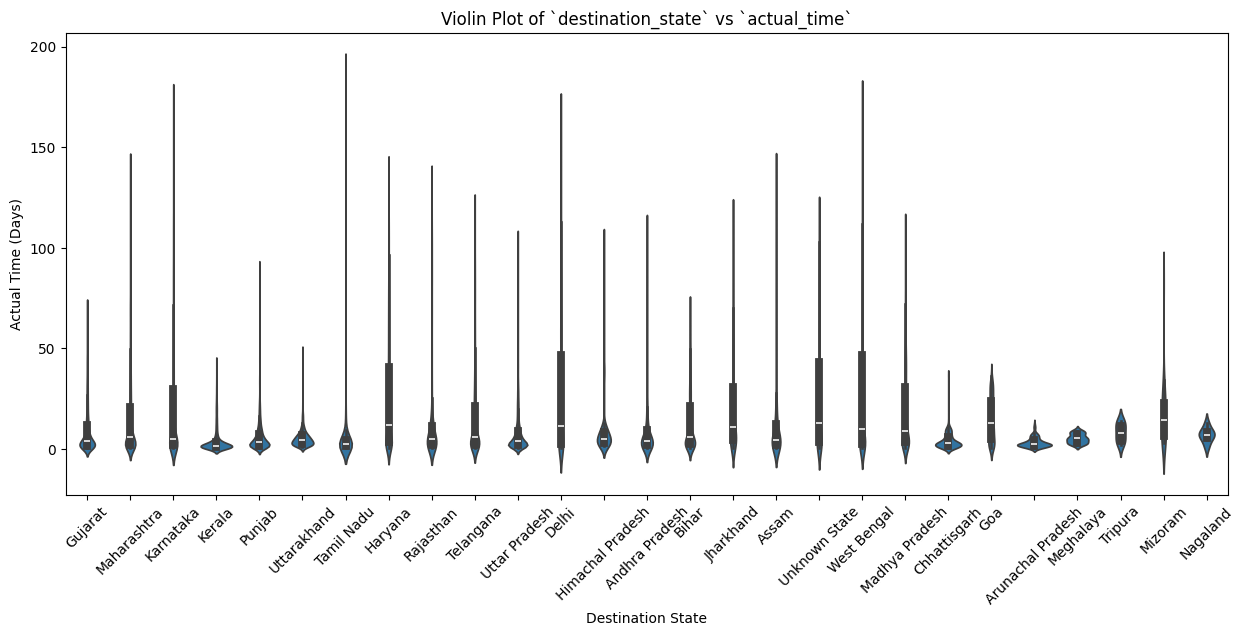

In [ ]:
# Violin Plot
plt.figure(figsize=(15, 6))
sns.violinplot(x='destination_state', y='actual_time', data=df_new)
plt.title("Violin Plot of `destination_state` vs `actual_time`")
plt.xlabel("Destination State")
plt.ylabel("Actual Time (Days)")
plt.xticks(rotation=45)
plt.show()

###source_state vs. actual_time

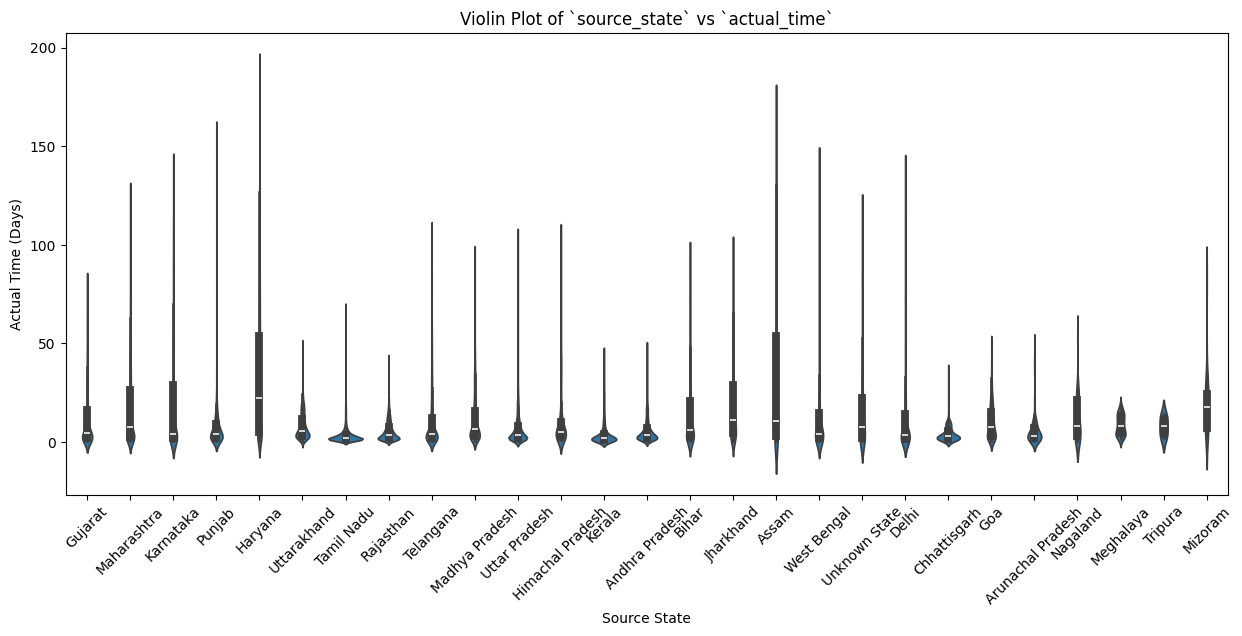

In [ ]:
# Violin Plot
plt.figure(figsize=(15, 6))
sns.violinplot(x='source_state', y='actual_time', data=df_new)
plt.title("Violin Plot of `source_state` vs `actual_time`")
plt.xlabel("Source State")
plt.ylabel("Actual Time (Days)")
plt.xticks(rotation=45)
plt.show()

###route_type vs. osrm_time

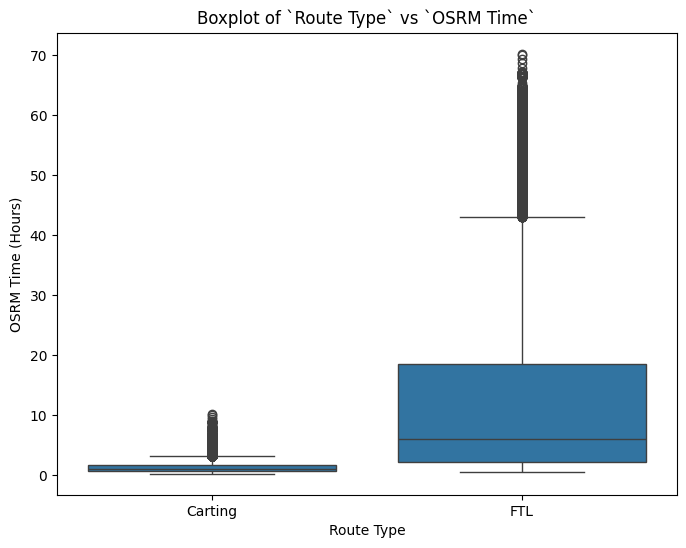

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='route_type', y='osrm_time', data=df_new)
plt.title("Boxplot of `Route Type` vs `OSRM Time`")
plt.xlabel("Route Type")
plt.ylabel("OSRM Time (Hours)")
plt.show()

##Pair Plot (For Multiple Numerical Columns)

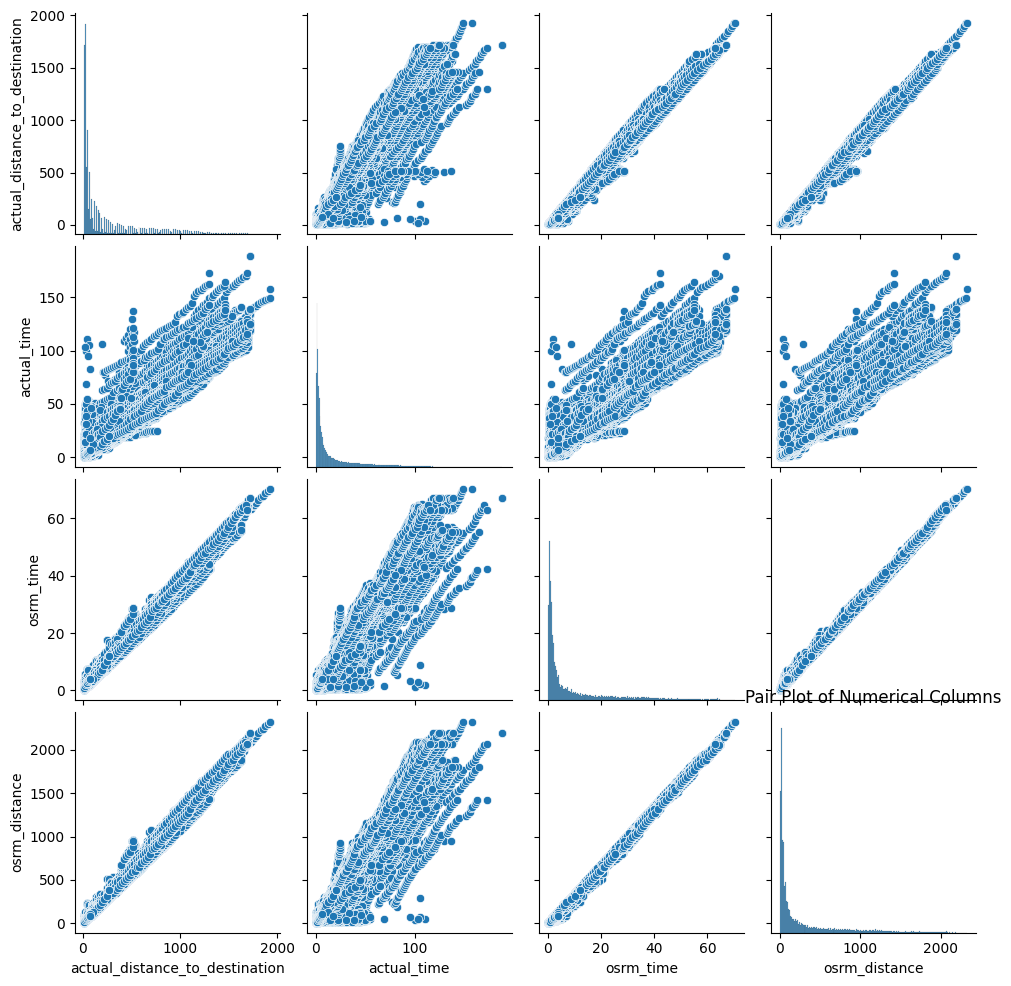

In [ ]:
# Pair Plot for multiple numerical variables
sns.pairplot(df_new[['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance']])
plt.title("Pair Plot of Numerical Columns")
plt.show()

##Categorical-Categorical Analysis with Stacked Bar Plot

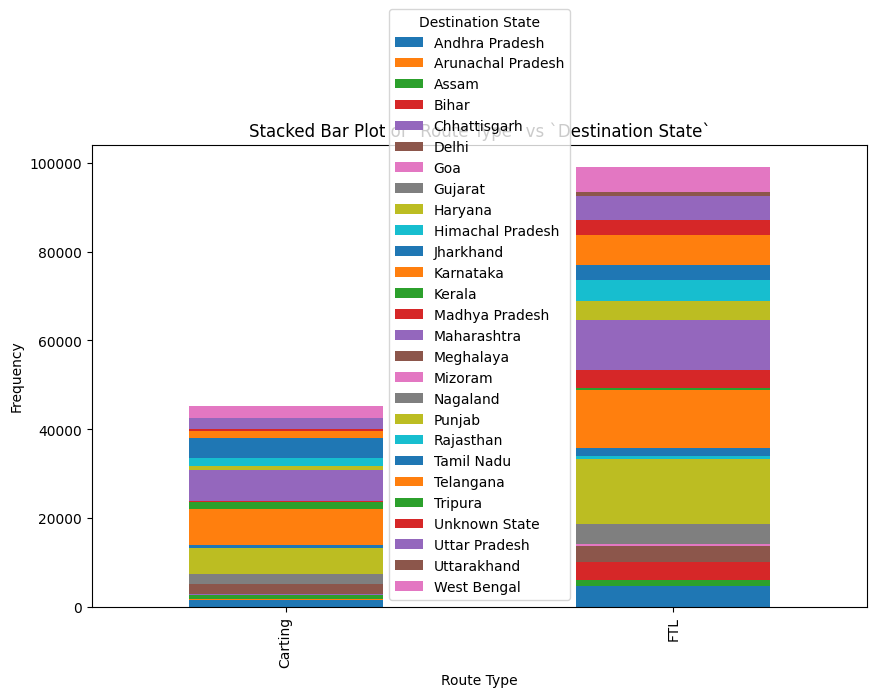

In [ ]:
# Frequency Count
route_vs_destination = pd.crosstab(df_new['route_type'], df_new['destination_state'])

# Stacked Bar Plot
route_vs_destination.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Stacked Bar Plot of `Route Type` vs `Destination State`")
plt.xlabel("Route Type")
plt.ylabel("Frequency")
plt.legend(title='Destination State')
plt.show()

##Analysis by Grouping the trip_uuid on source states and destination states

In [ ]:
df_new.head(2)

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                3.583333                       10.435660     0.583333   
1                3.583333                       18.936842     1.000000   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0   0.458333        11.9653             0.583333           0.458333   
1   0.833333        21.7243             0.416667           0.375000   

   segment_osrm_distance source_state destination_state  
0                11.9653      Gujarat           Gujarat  
1                 9.7590      Gujarat           Gujarat

In [ ]:
df_trip_counts = df_new.groupby(['trip_uuid', 'source_state', 'destination_state']).size().reset_index(name='trip_count')
df_source_state_trip_count = df_trip_counts['source_state'].value_counts().reset_index()
df_source_state_trip_count

source_state  count
0         Maharashtra   2797
1           Karnataka   2416
2             Haryana   1839
3          Tamil Nadu   1150
4       Uttar Pradesh    978
5           Telangana    838
6             Gujarat    819
7               Delhi    790
8         West Bengal    682
9              Punjab    663
10          Rajasthan    564
11     Andhra Pradesh    551
12     Madhya Pradesh    455
13      Unknown State    406
14              Bihar    398
15             Kerala    320
16              Assam    290
17          Jharkhand    189
18        Uttarakhand    182
19   Himachal Pradesh    143
20                Goa     74
21  Arunachal Pradesh     46
22       Chhattisgarh     43
23          Meghalaya     13
24            Mizoram      5
25           Nagaland      5
26            Tripura      1

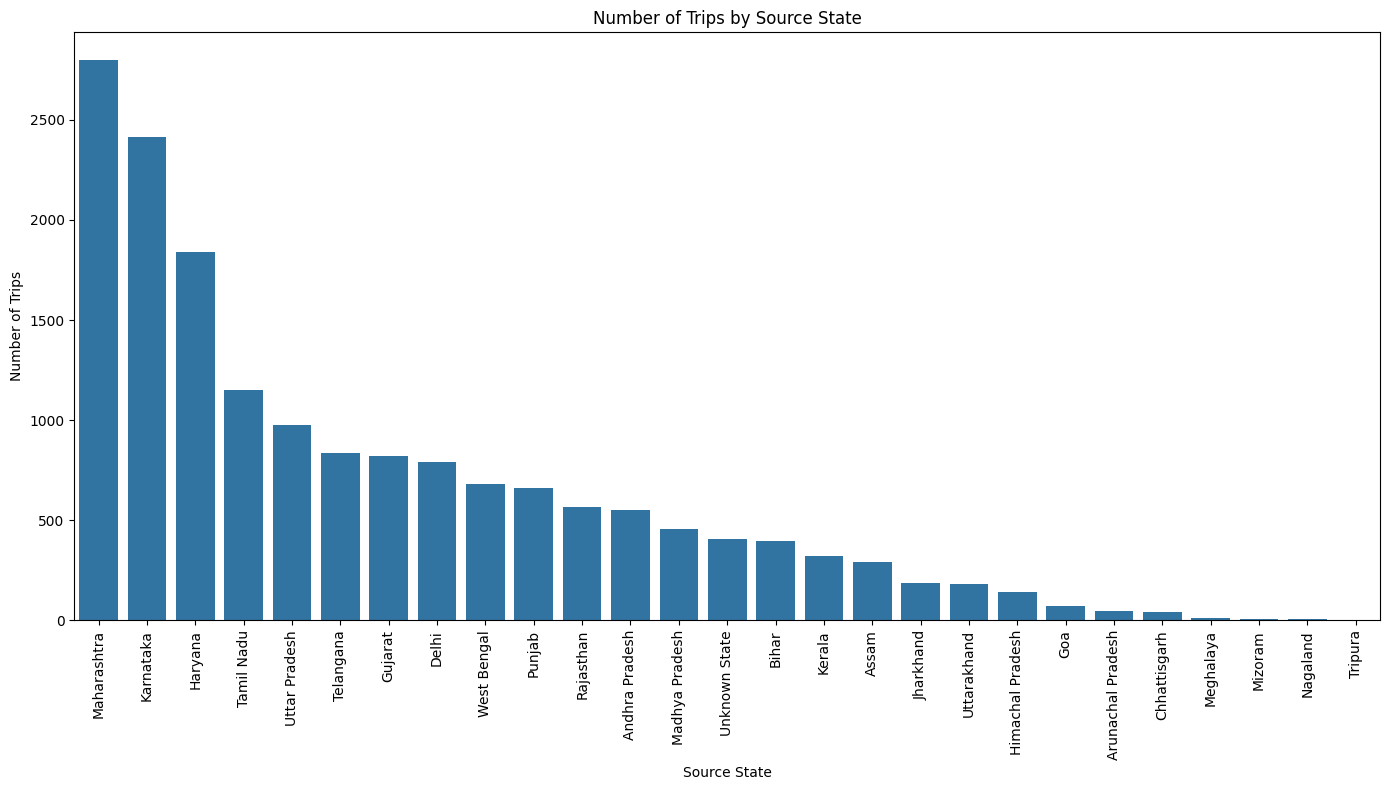

In [ ]:
plt.figure(figsize=(14, 8))

# Plot 1: Improved Bar Plot for Destination State
sns.barplot(data=df_source_state_trip_count, x='source_state', y='count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Number of Trips by Source State')
plt.xlabel('Source State')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

In [ ]:
df_destination_state_trip_count = df_trip_counts['destination_state'].value_counts().reset_index()
df_destination_state_trip_count

destination_state  count
0         Maharashtra   2705
1           Karnataka   2468
2             Haryana   1815
3          Tamil Nadu   1127
4       Uttar Pradesh    988
5           Telangana    902
6             Gujarat    819
7              Punjab    743
8         West Bengal    713
9               Delhi    674
10          Rajasthan    602
11     Andhra Pradesh    551
12     Madhya Pradesh    454
13              Bihar    403
14      Unknown State    387
15             Kerala    304
16              Assam    272
17          Jharkhand    197
18        Uttarakhand    180
19   Himachal Pradesh    161
20                Goa     74
21  Arunachal Pradesh     52
22       Chhattisgarh     43
23          Meghalaya     13
24            Mizoram      7
25            Tripura      2
26           Nagaland      1

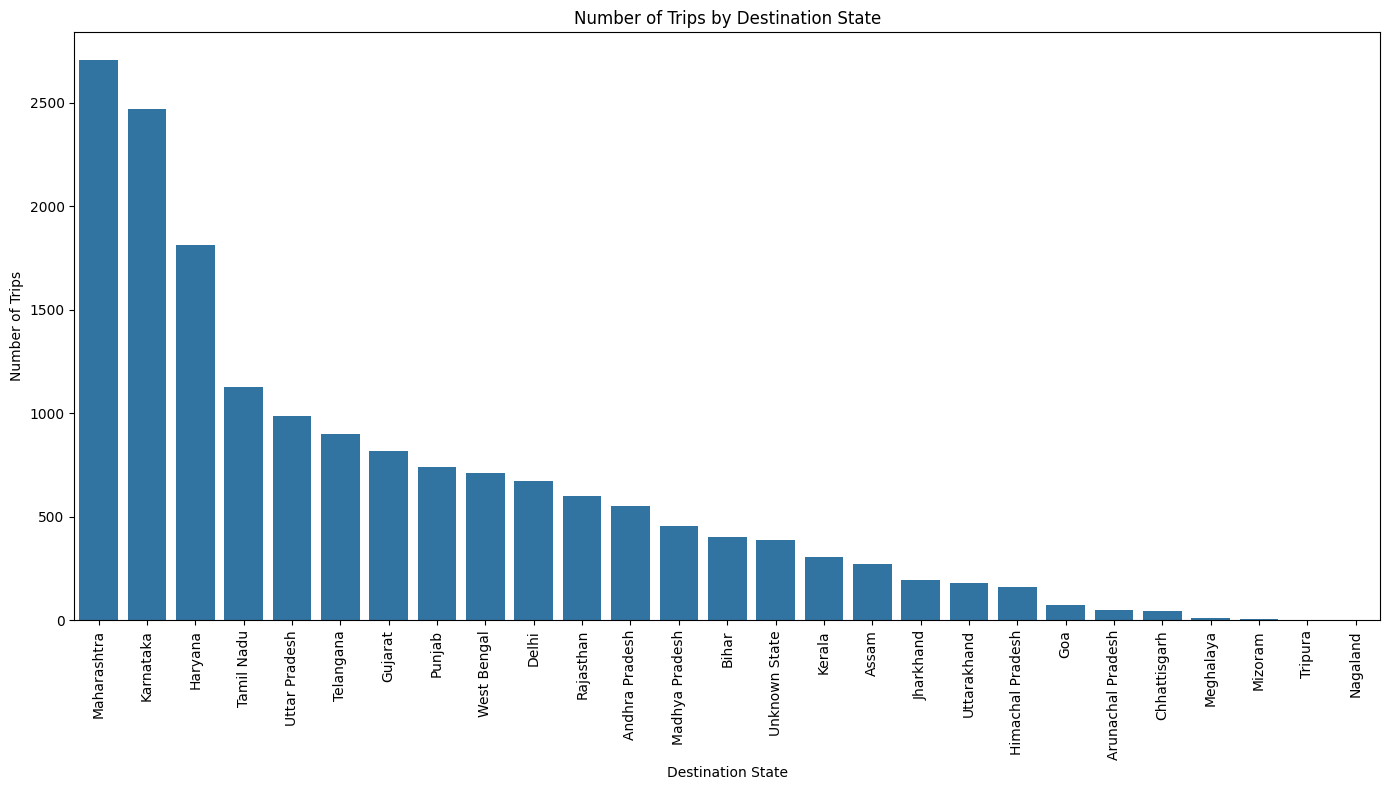

In [ ]:
plt.figure(figsize=(14, 8))

# Plot 1: Improved Bar Plot for Destination State
sns.barplot(data=df_destination_state_trip_count, x='destination_state', y='count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Number of Trips by Destination State')
plt.xlabel('Destination State')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

In [ ]:
df_source_state_trip_count.columns = ['State', 'Source_Trip_Count']
df_destination_state_trip_count.columns = ['State', 'Destination_Trip_Count']

# Merge source and destination dataframes on 'State'
merged_df = pd.merge(df_source_state_trip_count, df_destination_state_trip_count, on='State', how='outer')

# Fill any NaN values with 0 (in case some states are missing in either source or destination)
merged_df.fillna(0, inplace=True)

# Calculate the total trips (source + destination) for each state
merged_df['Total_Trips'] = merged_df['Source_Trip_Count'] + merged_df['Destination_Trip_Count']

# Sort by total trips to get a clearer view
merged_df.sort_values(by='Total_Trips', ascending=False, inplace=True)

# Print the merged dataframe for reference
merged_df

State  Source_Trip_Count  Destination_Trip_Count  Total_Trips
0         Maharashtra               2797                    2705         5502
1           Karnataka               2416                    2468         4884
2             Haryana               1839                    1815         3654
3          Tamil Nadu               1150                    1127         2277
4       Uttar Pradesh                978                     988         1966
5           Telangana                838                     902         1740
6             Gujarat                819                     819         1638
7               Delhi                790                     674         1464
9              Punjab                663                     743         1406
8         West Bengal                682                     713         1395
10          Rajasthan                564                     602         1166
11     Andhra Pradesh                551                     551         1102
12     Madhya Pradesh                455                     454          909
14              Bihar                398                     403          801
13      Unknown State                406                     387          793
15             Kerala                320                     304          624
16              Assam                290                     272          562
17          Jharkhand                189                     197          386
18        Uttarakhand                182                     180          362
19   Himachal Pradesh                143                     161          304
20                Goa                 74                      74          148
21  Arunachal Pradesh                 46                      52           98
22       Chhattisgarh                 43                      43           86
23          Meghalaya                 13                      13           26
24            Mizoram                  5                       7           12
25           Nagaland                  5                       1            6
26            Tripura                  1                       2            3

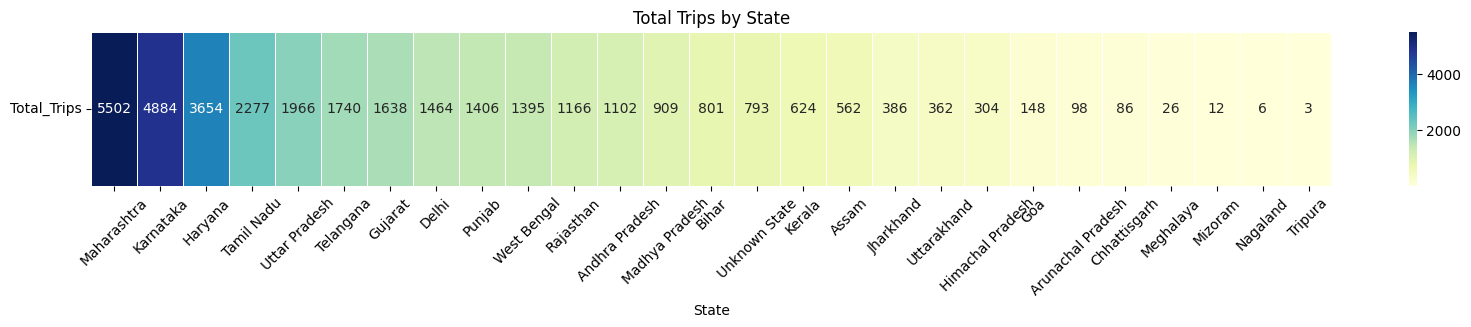

In [ ]:
heatmap_data = merged_df[['State', 'Total_Trips']].set_index('State').transpose()

# Plotting the heatmap
plt.figure(figsize=(20, 2))  # Adjust size to fit the data
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5, fmt='.0f')
plt.title('Total Trips by State')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#Feature Engineering

**Trip Duration:** Calculate the trip duration using od_start_time and od_end_time.  

**Distance Deviation:** Difference between actual distance (actual_distance_to_destination) and OSRM distance (osrm_distance).  

**Time Deviation:** Difference between actual time (actual_time) and OSRM time (osrm_time).  

**Speed Efficiency:** Compute speed based on actual distance and time, i.e., actual_distance_to_destination / actual_time.  

**State Transition:** Create a feature to check if the trip moves between different states (e.g., source_state != destination_state).

In [ ]:
df_new['od_start_time'] = pd.to_datetime(df_new['od_start_time'])
df_new['od_end_time'] = pd.to_datetime(df_new['od_end_time'])

# 1. Trip Duration (in days, as od_start_time and od_end_time are datetime)
df_new['trip_duration_days'] = (df_new['od_end_time'] - df_new['od_start_time']).dt.total_seconds() / (60 * 60 * 24)

# 2. Distance Deviation (Actual vs OSRM)
df_new['distance_deviation'] = df_new['actual_distance_to_destination'] - df_new['osrm_distance']

# 3. Time Deviation (Actual vs OSRM in days)
df_new['time_deviation_days'] = df_new['actual_time'] - df_new['osrm_time']

# 4. Speed Efficiency (km per day)
df_new['speed_efficiency_km_per_day'] = df_new['actual_distance_to_destination'] / df_new['actual_time']

# 5. State Transition (Binary 0/1 for inter-state trip)
df_new['state_transition'] = (df_new['source_state'] != df_new['destination_state']).astype(int)

# Check the new features
df_new.head()

data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

               od_start_time                od_end_time  \
0 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4 2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  ...  segment_osrm_time  segment_osrm_distance  \
0                3.583333  ...           0.458333                11.9653   
1                3.583333  ...           0.375000                 9.7590   
2                3.583333  ...           0.291667                10.8152   
3                3.583333  ...           0.500000                13.0224   
4                3.583333  ...           0.208333                 3.9153   

   source_state  destination_state  trip_duration_minutes  distance_deviation  \
0       Gujarat            Gujarat              86.213637           -1.529640   
1       Gujarat            Gujarat              86.213637           -2.787458   
2       Gujarat            Gujarat              86.213637           -4.902221   
3       Gujarat            Gujarat              86.213637           -9.443972   
4       Gujarat            Gujarat              86.213637          -14.832060   

   time_deviation_minutes speed_efficiency_kmph state_transition  \
0                     7.5             17.889703                0   
1                    10.0             18.936842                0   
2                    30.0             16.582367                0   
3                    55.0             13.981172                0   
4                    60.0             13.900955                0   

   trip_duration_days  time_deviation_days  speed_efficiency_km_per_day  
0            0.059871             0.125000                    17.889703  
1            0.059871             0.166667                    18.936842  
2            0.059871             0.500000                    16.582367  
3            0.059871             0.916667                    13.981172  
4            0.059871             1.000000                    13.900955  

[5 rows x 29 columns]

##Distribution of Trip Duration

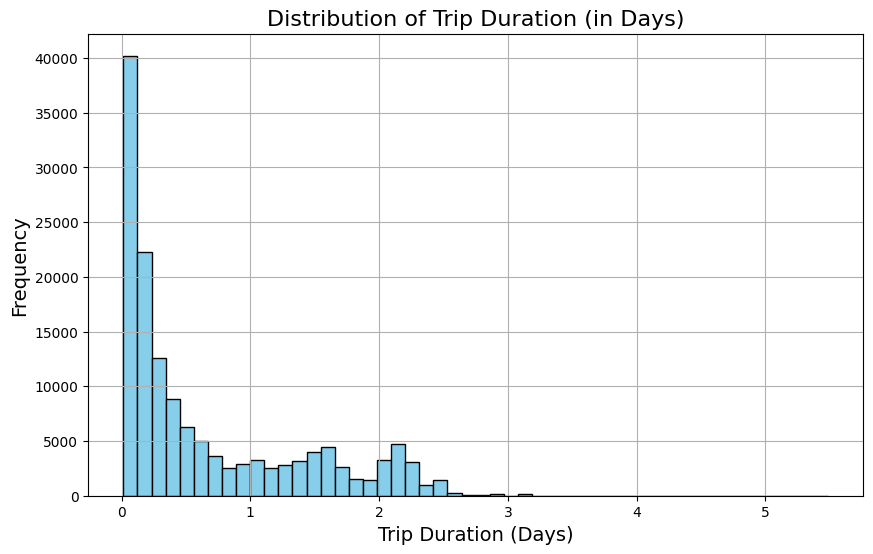

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_new['trip_duration_days'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Trip Duration (in Days)', fontsize=16)
plt.xlabel('Trip Duration (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

##Scatter Plot for Distance Deviation vs Time Deviation

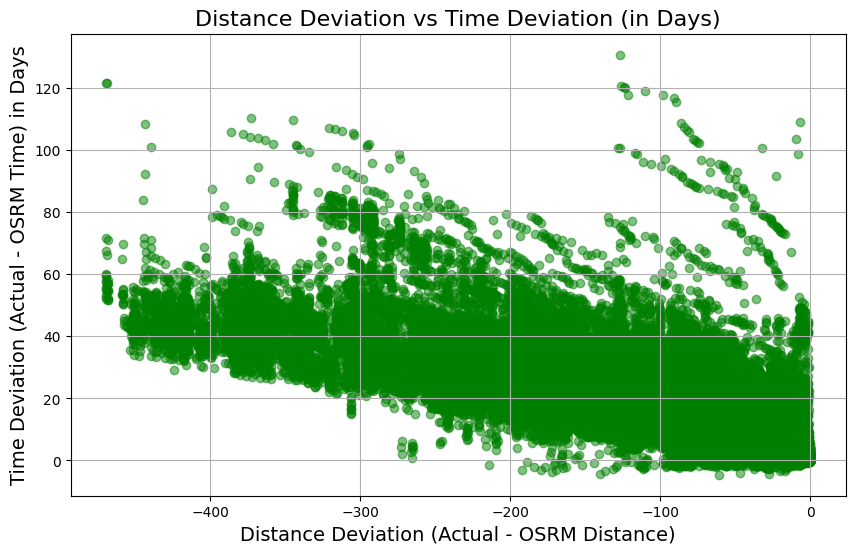

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_new['distance_deviation'], df_new['time_deviation_days'], alpha=0.5, color='green')
plt.title('Distance Deviation vs Time Deviation (in Days)', fontsize=16)
plt.xlabel('Distance Deviation (Actual - OSRM Distance)', fontsize=14)
plt.ylabel('Time Deviation (Actual - OSRM Time) in Days', fontsize=14)
plt.grid(True)
plt.show()

##Speed Efficiency (in km/day) Distribution

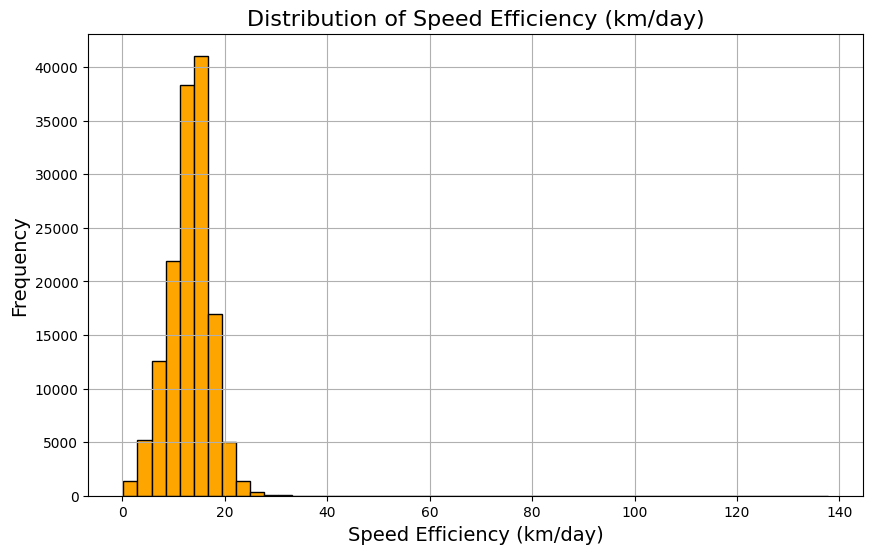

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_new['speed_efficiency_km_per_day'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Speed Efficiency (km/day)', fontsize=16)
plt.xlabel('Speed Efficiency (km/day)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

##Bar Plot for Inter-State vs Intra-State Performance

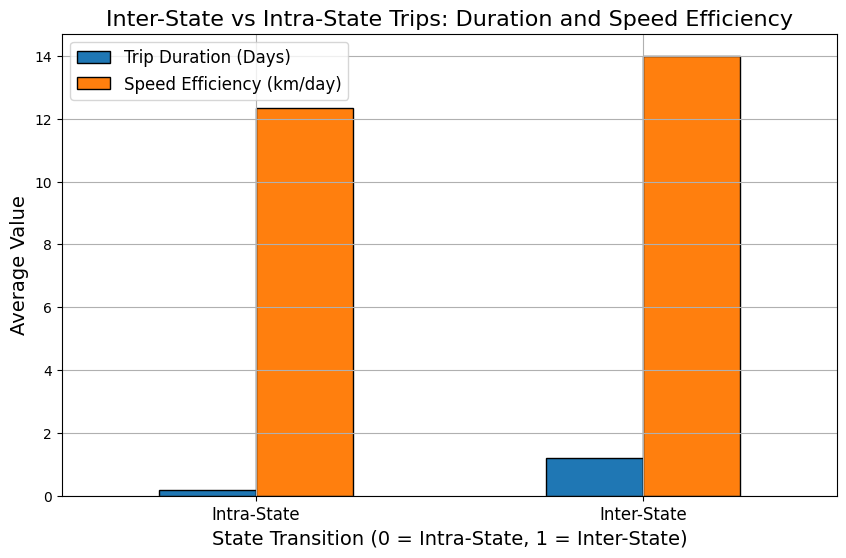

In [ ]:
state_transition_summary = df_new.groupby('state_transition')[['trip_duration_days', 'speed_efficiency_km_per_day']].mean()

# Plotting the results
state_transition_summary.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title('Inter-State vs Intra-State Trips: Duration and Speed Efficiency', fontsize=16)
plt.xlabel('State Transition (0 = Intra-State, 1 = Inter-State)', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.xticks([0, 1], ['Intra-State', 'Inter-State'], rotation=0, fontsize=12)
plt.legend(['Trip Duration (Days)', 'Speed Efficiency (km/day)'], fontsize=12)
plt.grid(True)
plt.show()

#Analysis by Aggregation

In [ ]:
# Grouping by 'trip_uuid' or 'route_schedule_uuid' and aggregating
aggregated_df = df_new.groupby('trip_uuid').agg({
    'actual_distance_to_destination': 'sum',  # Total distance for the trip
    'actual_time': 'sum',  # Total actual time for the trip
    'osrm_distance': 'sum',  # Total planned distance (OSRM)
    'osrm_time': 'sum',  # Total planned time (OSRM)
    'distance_deviation': 'mean',  # Average distance deviation
    'time_deviation_days': 'mean',  # Average time deviation
    'speed_efficiency_km_per_day': 'mean'  # Average speed efficiency
}).reset_index()

# Renaming columns for better readability
aggregated_df.columns = [
    'trip_uuid',
    'total_actual_distance',
    'total_actual_time',
    'total_osrm_distance',
    'total_osrm_time',
    'mean_distance_deviation',
    'mean_time_deviation_days',
    'avg_speed_efficiency_km_per_day'
]

# Display the aggregated result
aggregated_df.head()

trip_uuid  total_actual_distance  total_actual_time  \
0  trip-153671041653548748            8860.812105         653.416667   
1  trip-153671042288605164             240.208306          16.625000   
2  trip-153671043369099517           68163.502238        4676.041667   
3  trip-153671046011330457              28.529648           3.416667   
4  trip-153671052974046625             239.007304          23.166667   

   total_osrm_distance  total_osrm_time  mean_distance_deviation  \
0           10577.7647       324.458333               -44.024426   
1             269.4308         8.750000                -3.246944   
2           89447.2488      2740.333333              -239.143220   
3              31.6475         1.000000                -1.558926   
4             266.2914         8.625000                -3.897728   

   mean_time_deviation_days  avg_speed_efficiency_km_per_day  
0                  8.434829                        14.272287  
1                  0.875000                        15.075968  
2                 21.749532                        14.815767  
3                  1.208333                         9.417297  
4                  2.077381                        11.234825

##Efficiency Analysis Across Trips

In [ ]:
aggregated_df['avg_speed_efficiency_km_per_day'].describe()
aggregated_df[['trip_uuid', 'avg_speed_efficiency_km_per_day']].sort_values(by='avg_speed_efficiency_km_per_day').head(10)

trip_uuid  avg_speed_efficiency_km_per_day
1807   trip-153691774924973666                         0.287630
8648   trip-153775088157458469                         0.616705
13618  trip-153843860882255800                         0.765946
8767   trip-153777007135419827                         0.770901
2801   trip-153704259509954539                         0.836655
13569  trip-153843652777712187                         0.892891
12907  trip-153834371131417795                         0.896133
1871   trip-153693611027487878                         0.910215
326    trip-153674743034854688                         0.955775
14751  trip-153860958923357924                         0.962693

##Deviation Analysis

In [ ]:
# Top 10 trips with the highest average distance deviation
aggregated_df[['trip_uuid', 'mean_distance_deviation']].sort_values(by='mean_distance_deviation', ascending=False).head(10)

# Top 10 trips with the highest average time deviation
aggregated_df[['trip_uuid', 'mean_time_deviation_days']].sort_values(by='mean_time_deviation_days', ascending=False).head(10)

trip_uuid  mean_time_deviation_days
13577  trip-153843695443252828                 97.083333
5417   trip-153736469866480991                 81.137500
5731   trip-153739492878697753                 69.703390
7430   trip-153759174280800288                 66.375000
2131   trip-153696538597671544                 64.666667
9890   trip-153791496705218196                 62.963308
7265   trip-153757673070653230                 61.166667
5265   trip-153733174477629450                 60.000000
14509  trip-153858876340944305                 58.125541
3002   trip-153705652749826759                 56.416667

##Total Distance vs Total Time

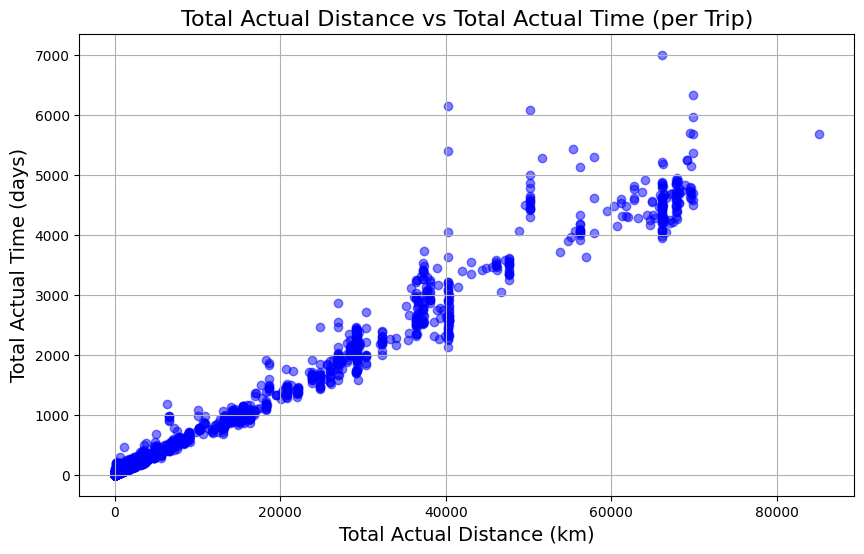

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_df['total_actual_distance'], aggregated_df['total_actual_time'], alpha=0.5, color='blue')
plt.title('Total Actual Distance vs Total Actual Time (per Trip)', fontsize=16)
plt.xlabel('Total Actual Distance (km)', fontsize=14)
plt.ylabel('Total Actual Time (days)', fontsize=14)
plt.grid(True)
plt.show()

##Deviation vs Efficiency

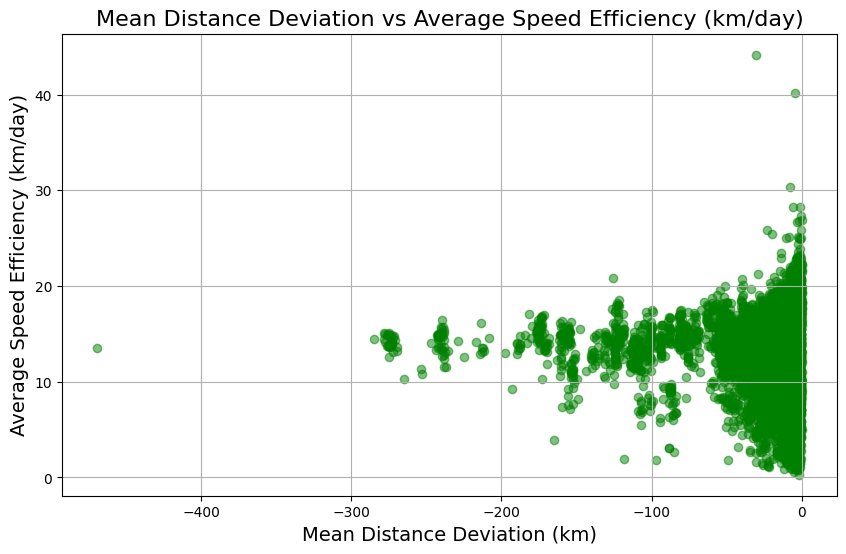

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_df['mean_distance_deviation'], aggregated_df['avg_speed_efficiency_km_per_day'], alpha=0.5, color='green')
plt.title('Mean Distance Deviation vs Average Speed Efficiency (km/day)', fontsize=16)
plt.xlabel('Mean Distance Deviation (km)', fontsize=14)
plt.ylabel('Average Speed Efficiency (km/day)', fontsize=14)
plt.grid(True)
plt.show()

**Interpretation:**
Efficiency: Identify trips with low speed efficiency to understand where time or distance is being wasted.  
**Deviation:** Trips with high deviations in time or distance could indicate inefficiencies, poor planning, or unexpected conditions.  
**Correlation:** Analyzing correlations between total distances, times, and deviations can uncover insights about how certain trips or routes perform compared to the planned route.

#IQR-Based Outlier Detection

In [ ]:
def iqr_outlier_removal(df, column):
    # Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Step 2: Compute IQR
    IQR = Q3 - Q1

    # Step 3: Determine bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 4: Filter out outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers

# Applying the function to remove outliers from 'actual_distance_to_destination', 'actual_time', and 'speed_efficiency_km_per_day'
df_cleaned = iqr_outlier_removal(df_new, 'actual_distance_to_destination')
df_cleaned = iqr_outlier_removal(df_cleaned, 'actual_time')
df_cleaned = iqr_outlier_removal(df_cleaned, 'speed_efficiency_km_per_day')

# Check the cleaned dataframe
df_cleaned.describe()

trip_creation_time                  od_start_time  \
count                         113406                         113406   
mean   2018-09-22 10:26:39.083940864  2018-09-22 14:57:30.407623936   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 00:52:50.361820928  2018-09-17 05:40:52.298089984   
50%    2018-09-22 00:55:32.018041088  2018-09-22 05:13:23.476081920   
75%    2018-09-27 13:25:51.684482048  2018-09-27 17:55:26.170548480   
max       2018-10-03 23:59:42.701692     2018-10-06 04:27:23.392375   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  \
count                         113406           113406.000000   
mean   2018-09-23 00:40:27.794135040               24.269174   
min       2018-09-12 00:50:10.814399                0.833333   
25%    2018-09-17 17:27:23.983799040                5.500000   
50%       2018-09-22 17:19:11.096192               11.833333   
75%       2018-09-28 03:37:58.044544               28.666667   
max       2018-10-07 00:50:44.569308              188.958333   
std                              NaN               30.148848   

       actual_distance_to_destination    actual_time      osrm_time  \
count                   113406.000000  113406.000000  113406.000000   
mean                        82.265081       6.356432       3.293122   
min                          9.000045       0.375000       0.250000   
25%                         22.220231       1.791667       0.958333   
50%                         44.147035       3.625000       1.833333   
75%                        110.216507       8.541667       4.166667   
max                        587.552148      27.708333      24.916667   
std                         93.881186       6.458808       3.462483   

       osrm_distance  segment_actual_time  segment_osrm_time  \
count  113406.000000        113406.000000      113406.000000   
mean      100.134358             1.375065           0.722784   
min         9.008200            -8.791667           0.000000   
25%        26.198375             0.708333           0.375000   
50%        51.123000             1.125000           0.666667   
75%       128.277900             1.625000           0.916667   
max       799.406700            27.458333          12.250000   
std       111.479612             1.385696           0.528558   

       segment_osrm_distance  trip_duration_minutes  distance_deviation  \
count          113406.000000          113406.000000       113406.000000   
mean               20.807072             582.956442          -17.869278   
min                 0.000000              20.702813         -272.919794   
25%                10.894075             132.513162          -23.494301   
50%                22.138100             284.754845           -9.343809   
75%                26.540450             688.046916           -3.805541   
max               320.753500            4535.715225            0.230174   
std                14.277314             723.572051           21.884761   

       time_deviation_minutes  speed_efficiency_kmph  state_transition  \
count           113406.000000          113406.000000     113406.000000   
mean               183.798653              12.900607          0.354567   
min               -192.500000               1.096141          0.000000   
25%                 42.500000               9.973764          0.000000   
50%                102.500000              13.121256          0.000000   
75%                255.000000              15.875367          1.000000   
max               1562.500000              24.833000          1.000000   
std                205.867752               4.255580          0.478384   

       trip_duration_days  time_deviation_days  speed_efficiency_km_per_day  
count       113406.000000        113406.000000                113406.000000  
mean             0.404831             3.063311                    12.900607  
min    

##Visualizing Outliers (Before and After)

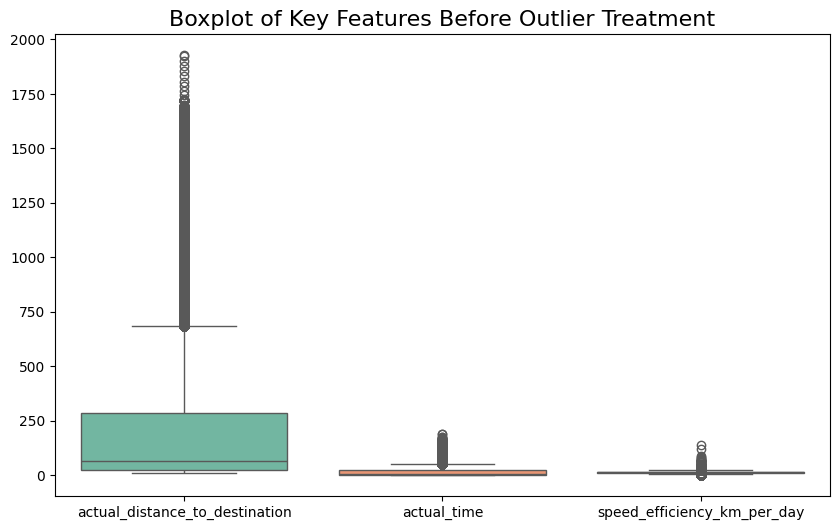

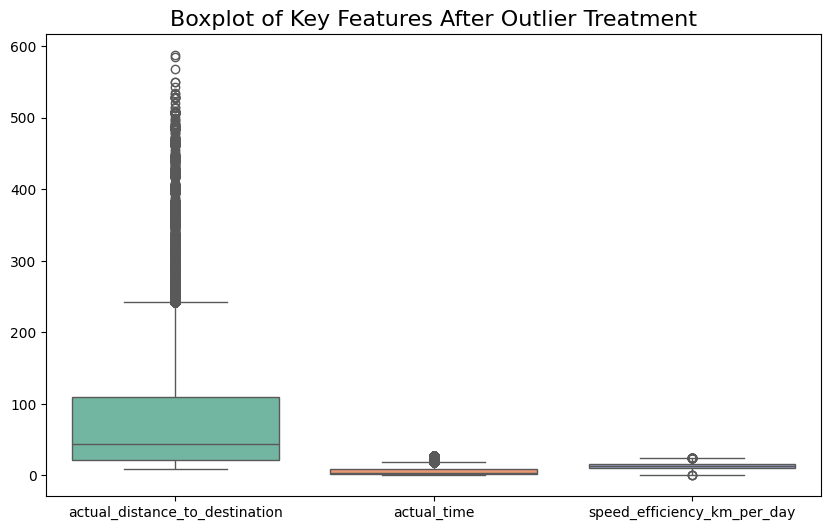

In [ ]:

# Before outlier treatment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[['actual_distance_to_destination', 'actual_time', 'speed_efficiency_km_per_day']], palette="Set2")
plt.title('Boxplot of Key Features Before Outlier Treatment', fontsize=16)
plt.show()

# After outlier treatment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['actual_distance_to_destination', 'actual_time', 'speed_efficiency_km_per_day']], palette="Set2")
plt.title('Boxplot of Key Features After Outlier Treatment', fontsize=16)
plt.show()


#Z-Score Based Outlier Detection



In [ ]:
from scipy import stats
def zscore_outlier_removal(df, column, threshold=3):
    df['zscore'] = abs(stats.zscore(df[column]))
    df_no_outliers = df[df['zscore'] < threshold]
    df.drop(columns=['zscore'], inplace=True)  # Dropping the zscore column after filtering
    return df_no_outliers

# Applying Z-score method on a column (e.g., 'actual_time')
df_cleaned_zscore = zscore_outlier_removal(df_new, 'actual_time')

# Checking the cleaned data
df_cleaned_zscore.describe()

trip_creation_time                  od_start_time  \
count                         140804                         140804   
mean   2018-09-22 12:39:11.105261824  2018-09-22 17:08:42.881910016   
min       2018-09-12 00:00:16.535741     2018-09-12 00:00:16.535741   
25%    2018-09-17 02:25:28.348109056  2018-09-17 07:04:19.589554944   
50%    2018-09-22 03:26:38.908198912  2018-09-22 07:32:43.360922368   
75%    2018-09-27 17:41:24.250782976  2018-09-27 21:23:39.502471936   
max       2018-10-03 23:59:42.701692     2018-10-06 04:27:23.392375   
std                              NaN                            NaN   

                         od_end_time  start_scan_to_end_scan  \
count                         140804           140804.000000   
mean   2018-09-23 08:17:05.419149824               37.828307   
min       2018-09-12 00:50:10.814399                0.833333   
25%    2018-09-18 00:43:19.258917120                6.541667   
50%    2018-09-23 02:04:51.756119040               17.916667   
75%    2018-09-28 10:52:46.332718592               62.708333   
max       2018-10-07 00:50:44.569308              188.958333   
std                              NaN               41.106213   

       actual_distance_to_destination    actual_time      osrm_time  \
count                   140804.000000  140804.000000  140804.000000   
mean                       205.382525      15.163470       7.826842   
min                          9.000045       0.375000       0.250000   
25%                         23.164358       2.083333       1.125000   
50%                         62.699640       5.208333       2.541667   
75%                        251.566425      19.125000       9.666667   
max                       1474.088867      92.250000      57.708333   
std                        292.913280      20.639601      10.810342   

       osrm_distance  segment_actual_time  segment_osrm_time  \
count  140804.000000        140804.000000      140804.000000   
mean      249.168424             1.490688           0.763922   
min         9.008200           -10.166667           0.000000   
25%        29.413675             0.791667           0.458333   
50%        75.145400             1.166667           0.708333   
75%       303.459475             1.666667           0.916667   
max      1907.573300            82.541667          30.708333   
std       354.814017             2.056073           0.554981   

       segment_osrm_distance  trip_duration_minutes  distance_deviation  \
count          140804.000000          140804.000000       140804.000000   
mean               22.591039             908.375621          -43.785899   
min                 0.000000              20.702813         -447.188238   
25%                11.911175             157.886674          -49.473717   
50%                23.400850             430.367149          -14.085702   
75%                27.687900            1505.422310           -4.680267   
max               995.163600            4535.715225            0.230174   
std                15.587372             986.549595           67.652175   

       time_deviation_minutes  speed_efficiency_kmph  state_transition  \
count           140804.000000          140804.000000     140804.000000   
mean               440.197668              13.146985          0.471421   
min               -275.000000               0.287630          0.000000   
25%                 52.500000              10.618943          0.000000   
50%                152.500000              13.527007          0.000000   
75%                552.500000              15.720309          1.000000   
max               4662.500000             137.768556          1.000000   
std                618.180149               4.186558          0.499184   

       trip_duration_days  time_deviation_days  speed_efficiency_km_per_day  \
count       140804.000000        140804.000000                140804.000000   
mean             0.630816             7.336628                    13.146985   
min 

##Visualizing Outliers (Before and After)

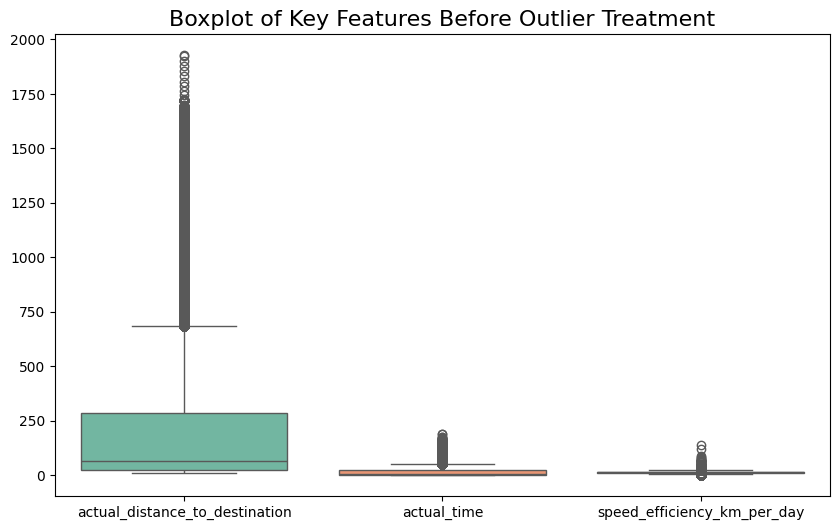

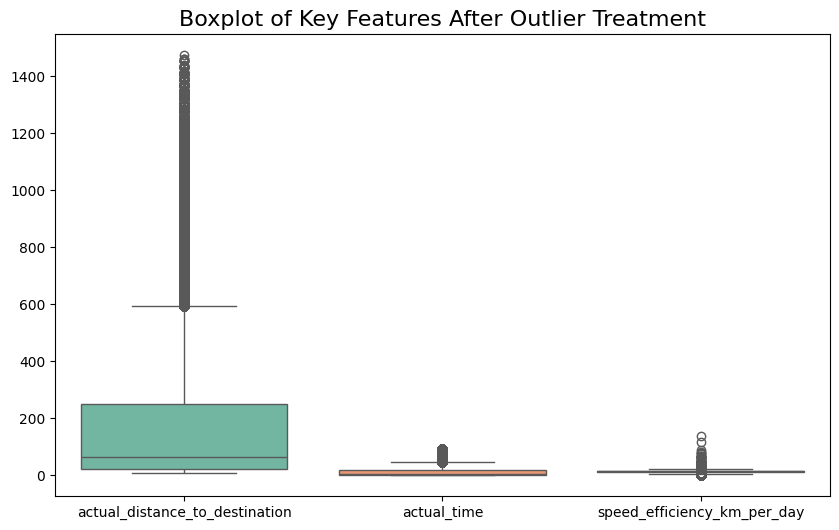

In [ ]:

# Before outlier treatment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[['actual_distance_to_destination', 'actual_time', 'speed_efficiency_km_per_day']], palette="Set2")
plt.title('Boxplot of Key Features Before Outlier Treatment', fontsize=16)
plt.show()

# After outlier treatment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned_zscore[['actual_distance_to_destination', 'actual_time', 'speed_efficiency_km_per_day']], palette="Set2")
plt.title('Boxplot of Key Features After Outlier Treatment', fontsize=16)
plt.show()

#<font color = 'orange'>Hypothesis Testing</font>

###<font color='brown'>'Actual Time' Vs 'OSRM Time' features Hypothesis Testing (Correlation)</font>
Test Assumptions:
*   H0: Actual time and OSRM time are not correlated.
*   Ha: Actual time and OSRM time are correlated.

In [ ]:
df_actual_osrm_time = df_new[['trip_uuid', 'actual_time', 'osrm_time']]

In [ ]:
df_actual_osrm_time.head(3)

trip_uuid  actual_time  osrm_time
0  trip-153741093647649320     0.583333   0.458333
1  trip-153741093647649320     1.000000   0.833333
2  trip-153741093647649320     1.666667   1.166667

In [ ]:
df_actual_osrm_time_grp= df_actual_osrm_time.groupby(by='trip_uuid').sum()

In [ ]:
df_actual_osrm_time_grp.head(3)

actual_time    osrm_time
trip_uuid                                        
trip-153671041653548748   653.416667   324.458333
trip-153671042288605164    16.625000     8.750000
trip-153671043369099517  4676.041667  2740.333333

In [ ]:
df_actual_osrm_time_grp.reset_index(inplace=True)

In [ ]:
df_actual_osrm_time_grp

trip_uuid  actual_time    osrm_time
0      trip-153671041653548748   653.416667   324.458333
1      trip-153671042288605164    16.625000     8.750000
2      trip-153671043369099517  4676.041667  2740.333333
3      trip-153671046011330457     3.416667     1.000000
4      trip-153671052974046625    23.166667     8.625000
...                        ...          ...          ...
14782  trip-153861095625827784     7.750000     6.166667
14783  trip-153861104386292051     1.375000     0.791667
14784  trip-153861106442901555    22.875000     5.583333
14785  trip-153861115439069069    25.000000    18.583333
14786  trip-153861118270144424    14.583333     4.416667

[14787 rows x 3 columns]

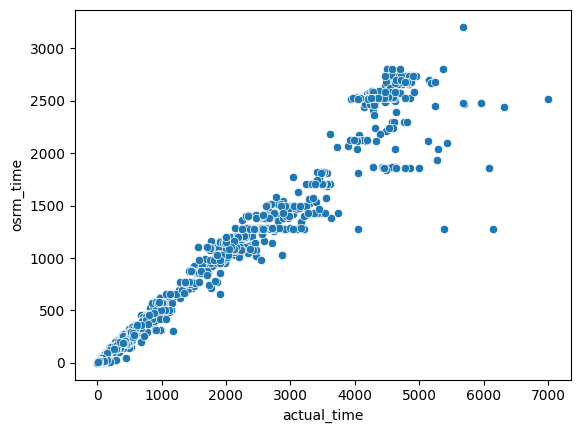

In [ ]:
sns.scatterplot(x=df_actual_osrm_time_grp['actual_time'], y=df_actual_osrm_time_grp['osrm_time'])
plt.show()

In [ ]:
spearmanr(df_actual_osrm_time_grp['actual_time'], df_actual_osrm_time_grp['osrm_time'])

SignificanceResult(statistic=0.9453981818641213, pvalue=0.0)

In [ ]:
pearsonr(df_actual_osrm_time_grp['actual_time'], df_actual_osrm_time_grp['osrm_time'])

PearsonRResult(statistic=0.9888817614796612, pvalue=0.0)

<font color='#b55418'>Final Conclusion:</font> From the above Spearman and Pearson Hypothesis Testing we can conclude that there is very high correlation between actual and osrm time with the correlation value of 0.945 and 0.988 respectively

###<font color='brown'>'Actual Time' Vs 'Segment Actual Time' features Hypothesis Testing (Correlation)</font>
Test Assumptions:
*   H0: Actual time and Segment Actual time are not correlated.
*   Ha: Actual time and Segment Actual are correlated.

In [ ]:
df_actual_segmentActual_time = df_new[['trip_uuid', 'actual_time', 'segment_actual_time']]

In [ ]:
df_actual_segmentActual_time.head(3)

trip_uuid  actual_time  segment_actual_time
0  trip-153741093647649320     0.583333             0.583333
1  trip-153741093647649320     1.000000             0.416667
2  trip-153741093647649320     1.666667             0.666667

In [ ]:
df_actual_segmentActual_time_grpBy_mean= df_actual_segmentActual_time.groupby(by='trip_uuid').sum()

In [ ]:
df_actual_segmentActual_time_grpBy_mean.head(2)

actual_time  segment_actual_time
trip_uuid                                                
trip-153671041653548748   653.416667               64.500
trip-153671042288605164    16.625000                5.875

In [ ]:
df_actual_segmentActual_time_grpBy_mean.reset_index(inplace=True)
df_actual_segmentActual_time_grpBy_mean.head(2)

trip_uuid  actual_time  segment_actual_time
0  trip-153671041653548748   653.416667               64.500
1  trip-153671042288605164    16.625000                5.875

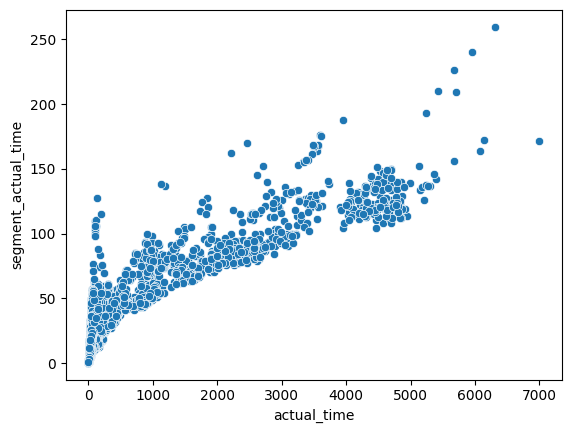

In [ ]:
sns.scatterplot(x=df_actual_segmentActual_time_grpBy_mean['actual_time'], y=df_actual_segmentActual_time_grpBy_mean['segment_actual_time'])
plt.show()

In [ ]:
spearmanr(df_actual_segmentActual_time_grpBy_mean['actual_time'], df_actual_segmentActual_time_grpBy_mean['segment_actual_time'])

SignificanceResult(statistic=0.9617620327529969, pvalue=0.0)

In [ ]:
pearsonr(df_actual_segmentActual_time_grpBy_mean['actual_time'], df_actual_segmentActual_time_grpBy_mean['segment_actual_time'])

PearsonRResult(statistic=0.8754480629633586, pvalue=0.0)

<font color='#b55418'>Final Conclusion:</font> From the above Spearman and Pearson Hypothesis Testing we can conclude that there is very high correlation between actual and osrm time with the correlation value of 0.961 and 0.875 respectively

##Two-Sample t-test: actual_distance_to_destination by route_type
**Hypothesis:**  
**H0:** The mean actual_distance_to_destination for Carting and FTL routes is the same.  

**H1:** The mean actual_distance_to_destination for Carting and FTL routes is different.

In [ ]:
# Subset the data by route_type
carting_distance = df_new[df_new['route_type'] == 'Carting']['actual_distance_to_destination']
linehaul_distance = df_new[df_new['route_type'] == 'FTL']['actual_distance_to_destination']

# Two-sample t-test
t_stat, p_val = ttest_ind(carting_distance, linehaul_distance, nan_policy='omit')

print(f'Two-sample t-test for actual_distance_to_destination by route_type: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}')

Two-sample t-test for actual_distance_to_destination by route_type: t-statistic = -169.096, p-value = 0.000


**Summary:**  
This test checks whether the mean distance to destination is different for Carting and FTL routes.   

**Conclusion:**  
If p < 0.05, reject H0, there is a significant difference between Carting and FTL distances.

##Paired t-test: actual_time and osrm_time

**Hypothesis:**  
**H0:** There is no difference between the actual_time and osrm_time (estimated time) for each trip.  
**H1:** There is a significant difference between the actual_time and osrm_time for each trip.

In [ ]:
# Paired t-test (actual_time vs osrm_time for each trip)
t_stat, p_val = ttest_rel(df_new['actual_time'], df_new['osrm_time'], nan_policy='omit')

print(f'Paired t-test for actual_time and osrm_time: t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}')

Paired t-test for actual_time and osrm_time: t-statistic = 254.251, p-value = 0.000


**Summary:**

This test compares the actual time taken for trips and the OSRM estimated time to check for discrepancies.  
**Conclusion:**

If p < 0.05, reject H0, concluding that there is a significant difference between actual_time and osrm_time for the trips.

##ANOVA: speed_efficiency_km_per_day Across Different source_states

**Hypothesis:**  
**H0:** The mean speed_efficiency_km_per_day is the same across different source_states.  
**H1:** At least one state has a significantly different mean speed_efficiency_km_per_day.

In [ ]:

# Group data by different source states
gujarat_efficiency = df_new[df_new['source_state'] == 'Gujarat']['speed_efficiency_km_per_day']
maharashtra_efficiency = df_new[df_new['source_state'] == 'Maharashtra']['speed_efficiency_km_per_day']
karnataka_efficiency = df_new[df_new['source_state'] == 'Karnataka']['speed_efficiency_km_per_day']

# ANOVA test for speed efficiency across states
f_stat, p_val = f_oneway(gujarat_efficiency, maharashtra_efficiency, karnataka_efficiency)

print(f'ANOVA for speed_efficiency_km_per_day across source_state: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f}')

ANOVA for speed_efficiency_km_per_day across source_state: F-statistic = 497.402, p-value = 0.000


**Summary:**

This test compares the speed efficiency across different states to determine whether there's a significant difference among them.

**Conclusion:**  

If p < 0.05, reject H0, indicating that at least one state has a significantly different mean speed efficiency.

##Correlation Test: actual_distance_to_destination and actual_time  

**Hypothesis:**  
**H0:** There is no linear relationship between actual_distance_to_destination and actual_time.  
**H1:** There is a linear relationship between actual_distance_to_destination and actual_time.

In [ ]:
# Correlation between actual_distance_to_destination and actual_time
corr, p_val = pearsonr(df_new['actual_distance_to_destination'], df_new['actual_time'])

print(f'Pearson correlation between actual_distance_to_destination and actual_time: correlation = {corr:.3f}, p-value = {p_val:.3f}')

Pearson correlation between actual_distance_to_destination and actual_time: correlation = 0.979, p-value = 0.000


**Summary:**

This test checks whether there is a significant linear relationship between the actual_distance_to_destination and the actual_time.  
**Conclusion:**

If p < 0.05, reject H0, concluding that there is a significant correlation between actual_distance_to_destination and actual_time.

#Column Normalization /Column Standardization

##Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = ['actual_time', 'actual_distance_to_destination', 'speed_efficiency_km_per_day']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_new.copy()  # Copying the original dataframe
df_normalized[columns_to_normalize] = scaler.fit_transform(df_new[columns_to_normalize])

# Display the normalized dataframe
print("Normalized DataFrame:")
print(df_normalized[columns_to_normalize].head())


Normalized DataFrame:
   actual_time  actual_distance_to_destination  speed_efficiency_km_per_day
0     0.001105                        0.000748                     0.128753
1     0.003316                        0.005180                     0.136363
2     0.006854                        0.009715                     0.119252
3     0.011718                        0.014135                     0.100347
4     0.013044                        0.015839                     0.099764


**Summary of Normalization:**  
**Objective:**   Transform the selected columns (actual_time, actual_distance_to_destination, speed_efficiency_km_per_day) into a range of [0, 1].  
**When to use:**   Normalization is useful when your data follows a non-Gaussian distribution or when features have different units and you want to bound them to the same scale.
Columns Transformed: All the values in these columns will now range between 0 and 1.

##Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
columns_to_standardize = ['actual_time', 'actual_distance_to_destination', 'speed_efficiency_km_per_day']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_standardized = df_new.copy()  # Copying the original dataframe
df_standardized[columns_to_standardize] = scaler.fit_transform(df_new[columns_to_standardize])

# Display the standardized dataframe
print("Standardized DataFrame:")
print(df_standardized[columns_to_standardize].head())

Standardized DataFrame:
   actual_time  actual_distance_to_destination  speed_efficiency_km_per_day
0    -0.674521                       -0.649164                     1.143294
1    -0.657825                       -0.624557                     1.395756
2    -0.631111                       -0.599374                     0.828099
3    -0.594379                       -0.574826                     0.200958
4    -0.584361                       -0.565366                     0.181618


**Summary of Standardization:**  
**Objective:** Standardize the selected columns so they have a mean of 0 and a standard deviation of 1.   
**When to use:** Standardization is recommended when your data follows a Gaussian (normal) distribution or when you are working with algorithms like SVM, KNN, or logistic regression that rely on distance measures and assume the data is normally distributed.  
**Columns Transformed:** The mean of each column will be 0, and the standard deviation will be 1.

#Insights and Recommandations

##<font color='green'>Insights:
**<font color='darkpink'>Trip Efficiency:</font>**

The **mean trip duration** from start to end scan is approximately **40 days**, with a wide range (min: 0.83 days, max: 329 days).   
This indicates variability in delivery performance, which may arise from operational inefficiencies or external factors like traffic and route conditions.  **Actual delivery time** averages **17.4** days, but the open-source routing machine (OSRM) estimates it should be around **8.9 days**, revealing a significant gap between predicted and actual times.  

**<font color='darkpink'>Route Type Efficiency:</font>**

About **69%** of deliveries are done via **FTL (Full Truck Load)**, which typically involves faster deliveries as no stops are made for additional pickups/drop-offs. The remaining **31%** use **Carting**, which could contribute to longer delivery times due to multiple stops or less efficient routing.  

**<font color='darkpink'>Geographical Distribution:<font>**

**Haryana** is the most common source state (19% of deliveries), followed by **Maharashtra** (14.8%) and **Karnataka** (13.5%). These regions account for a significant portion of deliveries and are critical to optimize for efficiency.
For destination states, **Karnataka** (14.6%) and **Haryana** (14.3%) are also key, with **West Bengal, Telangana**, and **Tamil Nadu** following.  

**<font color='darkpink'>Outlier and Segment Performance:**

There is skewness and kurtosis in trip duration, actual distances, and delivery times, indicating the presence of outliers. For instance, some deliveries have abnormally long times (up to 329 days), which should be investigated as anomalies.
Segment-level analysis shows that while most segments take 1-2 hours, some segments extend much longer than OSRM predictions, showing inefficient routing or operational delays.  

**<font color='darkpink'>Correlation between Distance and Time:**

There is a strong positive correlation between actual distance and actual time (0.98), confirming that longer routes predictably lead to longer delivery times. However, the large discrepancy between OSRM estimates and actual performance highlights the need for real-time traffic and condition data.

**<font color='darkpink'>Performance by States:**

**Haryana, Maharashtra, and Karnataka** are the busiest states for both origin and destination points. These states are critical operational hubs that need better resource allocation to handle the volume.

##**<font color='green'>Recommendations:**  

**<font color='darkpink'>Optimize Route Planning:**

Focus on reducing the large gap between OSRM-predicted and actual times by improving route planning and incorporating **real-time traffic data**. Reassess the **Carting routes** as they may be contributing to delays due to multiple pickups and stops.  

**<font color='darkpink'>Geographical Prioritization:**

Given that **Haryana, Karnataka, and Maharashtra** are major states for both sources and destinations, consider improving warehouse capacity and optimizing truck allocations in these regions. This will help reduce congestion and improve delivery times.
**<font color='darkpink'>  
Outlier Management:**

Investigate outliers in trip times and distances to identify common factors causing extreme delays. This could include vehicle breakdowns, weather disruptions, or inefficient transfer processes at sorting hubs. Implement faster recovery or contingency plans for outlier cases.
**<font color='darkpink'>  
Segment-Level Efficiency:**

Focus on segment optimization where the actual time deviates significantly from OSRM predictions. Investigate specific routes and segments that consistently take longer and implement targeted operational improvements.  

**<font color='darkpink'> Cutoff Time Management:**

Although cutoff time fields were not fully understood, analyzing how cutoff times align with delays could offer actionable insights. Ensuring timely starts to deliveries before cutoffs could help improve overall performance.  

**<font color='darkpink'>Data-Driven Decision Making:**

Use predictive models to forecast delivery times and optimize fleet and warehouse capacity. Standardize best practices for the states and routes that exhibit the most efficient delivery times and expand these methods to underperforming regions.

